# Who Pays Writers: Relationships and Distributions

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
% matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300


plt.style.use('seaborn')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
warnings.filterwarnings('ignore')

df = pd.read_csv('allData_clean.csv')
df.sample(3)

,publication,year,wordRate,wordCount,flatRate,totalPaid,paymentDifficulty,daysToBePaid,storyType,levelOfReporting,relationship,rights,platform,contract,comment
1604,Earth Island Journal,2017,0.08,1200.0,False,96.0,1.0,15,News,Medium,Cold Pitch,First,Digital,No,NaN
1274,Current Affairs,2017,0.05,3000.0,False,150.0,2.0,30,Profile,Light,Cold Pitch,Unknown/Other,Digital,Verbal,NaN
2124,Medium,2017,0.25,1000.0,False,250.0,1.0,30,Blog,Medium,Ongoing,All,Digital,Yes,NaN


Data is roughly structured into the following groups
* Meta
    * publication
    * year : 2012-2018
* Payment
    * wordRate : (Dollar per word, regardless of flatRate)
    * wordCount
    * flatRate : True/False
    * totalPaid
* Payment red tape
    * paymentDifficulty : 1-5 (where 1 is "beyond easy", 5 is "impossible")*
    * daysToBePaid : 15, 30, 42, 60, 90, >90
* Effort
    * storyType : News, Opinion, Feature, Blog, Criticism, Profile, FoB (front of book)
    * levelOfReporting : Light, Medium, Heavy
* Business
    * relationship : Cold Pitch, Ongoing, Assignment, Referral, Solicited Pitch, Spec
    * rights : First, Secondary, All, Unknown/Other**
    * platform : Digital, Print
    * contract : Yes, No, Verbal
* Other
    * comment

---
*paymentDifficulty: The wording and emojis used in survey

`1` beyond easy 😍

`2` not that difficult 😏

`3` an average amount of hassle 🙄

`4` a huge hassle 😤

`5` impossible 😡

---

**Rights

`First`

First Serial Rights:
The publication bought exclusive rights to publish the material first, then rights ultimately revert to me (notwithstanding the publication’s ability to keep the material available as part of its digital archive or website, nonexclusively)

`Secondary`

Second Rights:
The publication bought rights to republish/reprint material that had already appeared elsewhere

`All`

All rights:

The publication bought all rights, or it was a work for hire; I gave up my rights to republish or use the work elsewhere

# Numerical Data

## Independent distributions

Text(0.5,0,'percent')

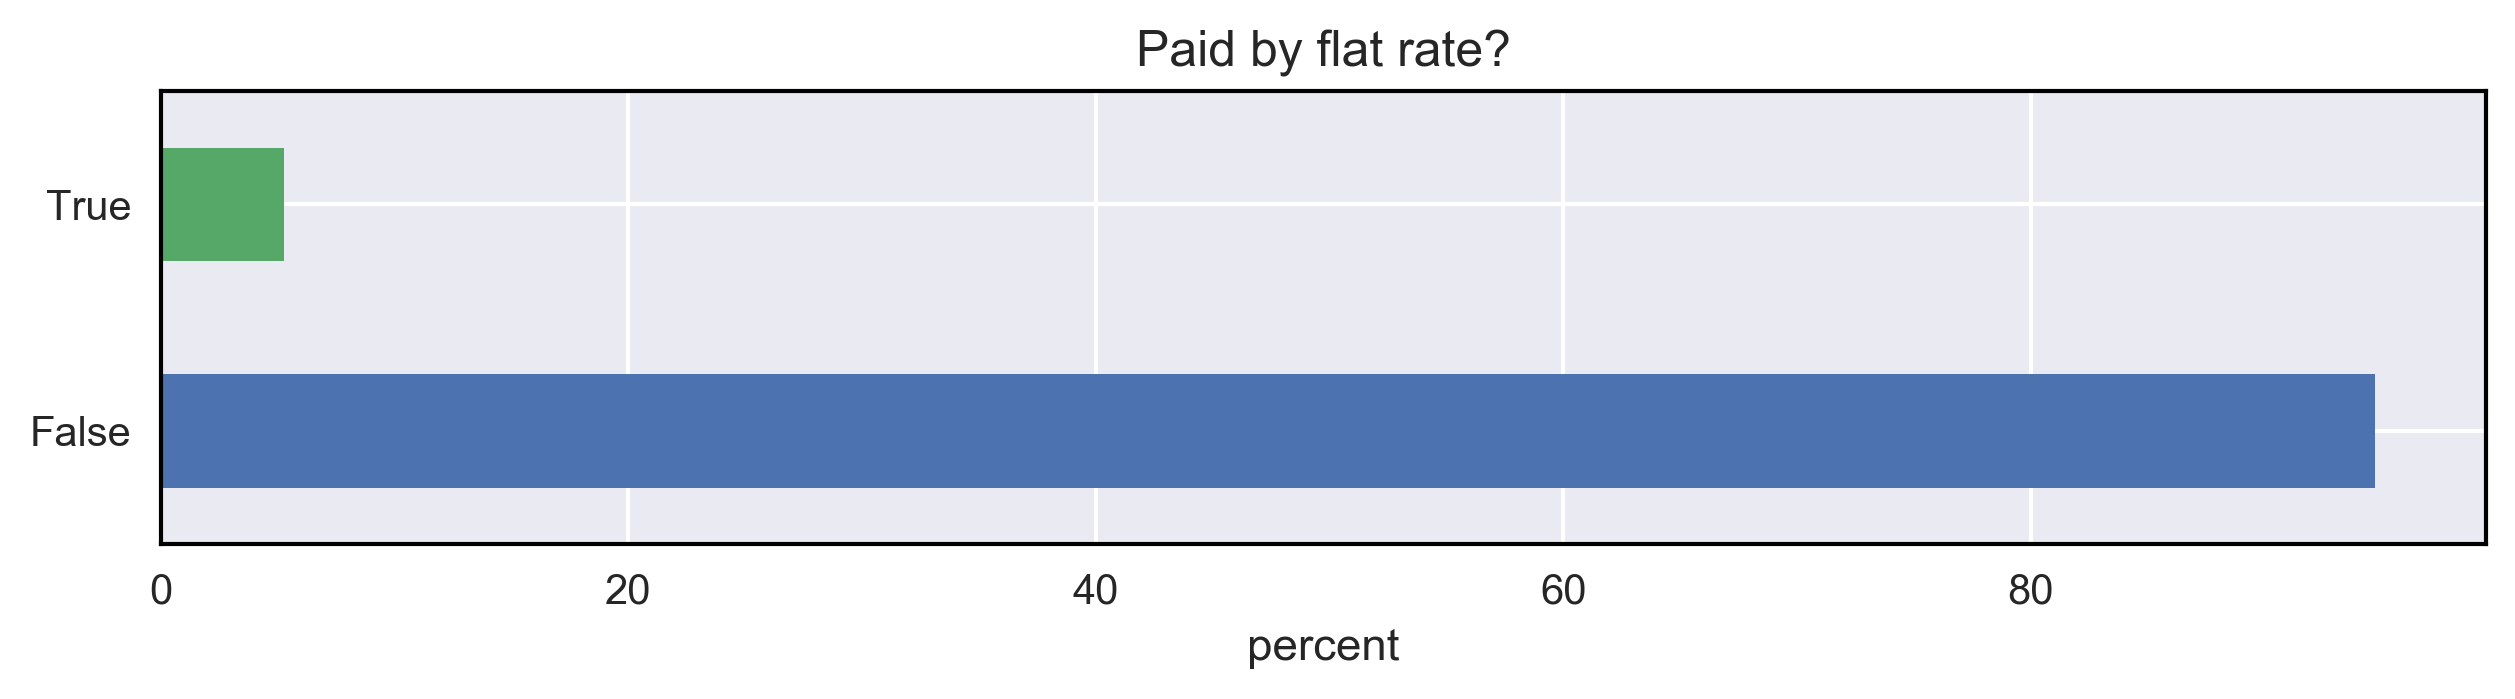

In [42]:
N = df.flatRate.count()
ax = (df.flatRate.value_counts()/N*100).plot(kind='barh', figsize=(10, 2), title='Paid by flat rate?')
ax.set_xlabel('percent')

In [43]:
num = ['totalPaid', 'wordRate', 'wordCount']

Text(0,0.5,'number of words')

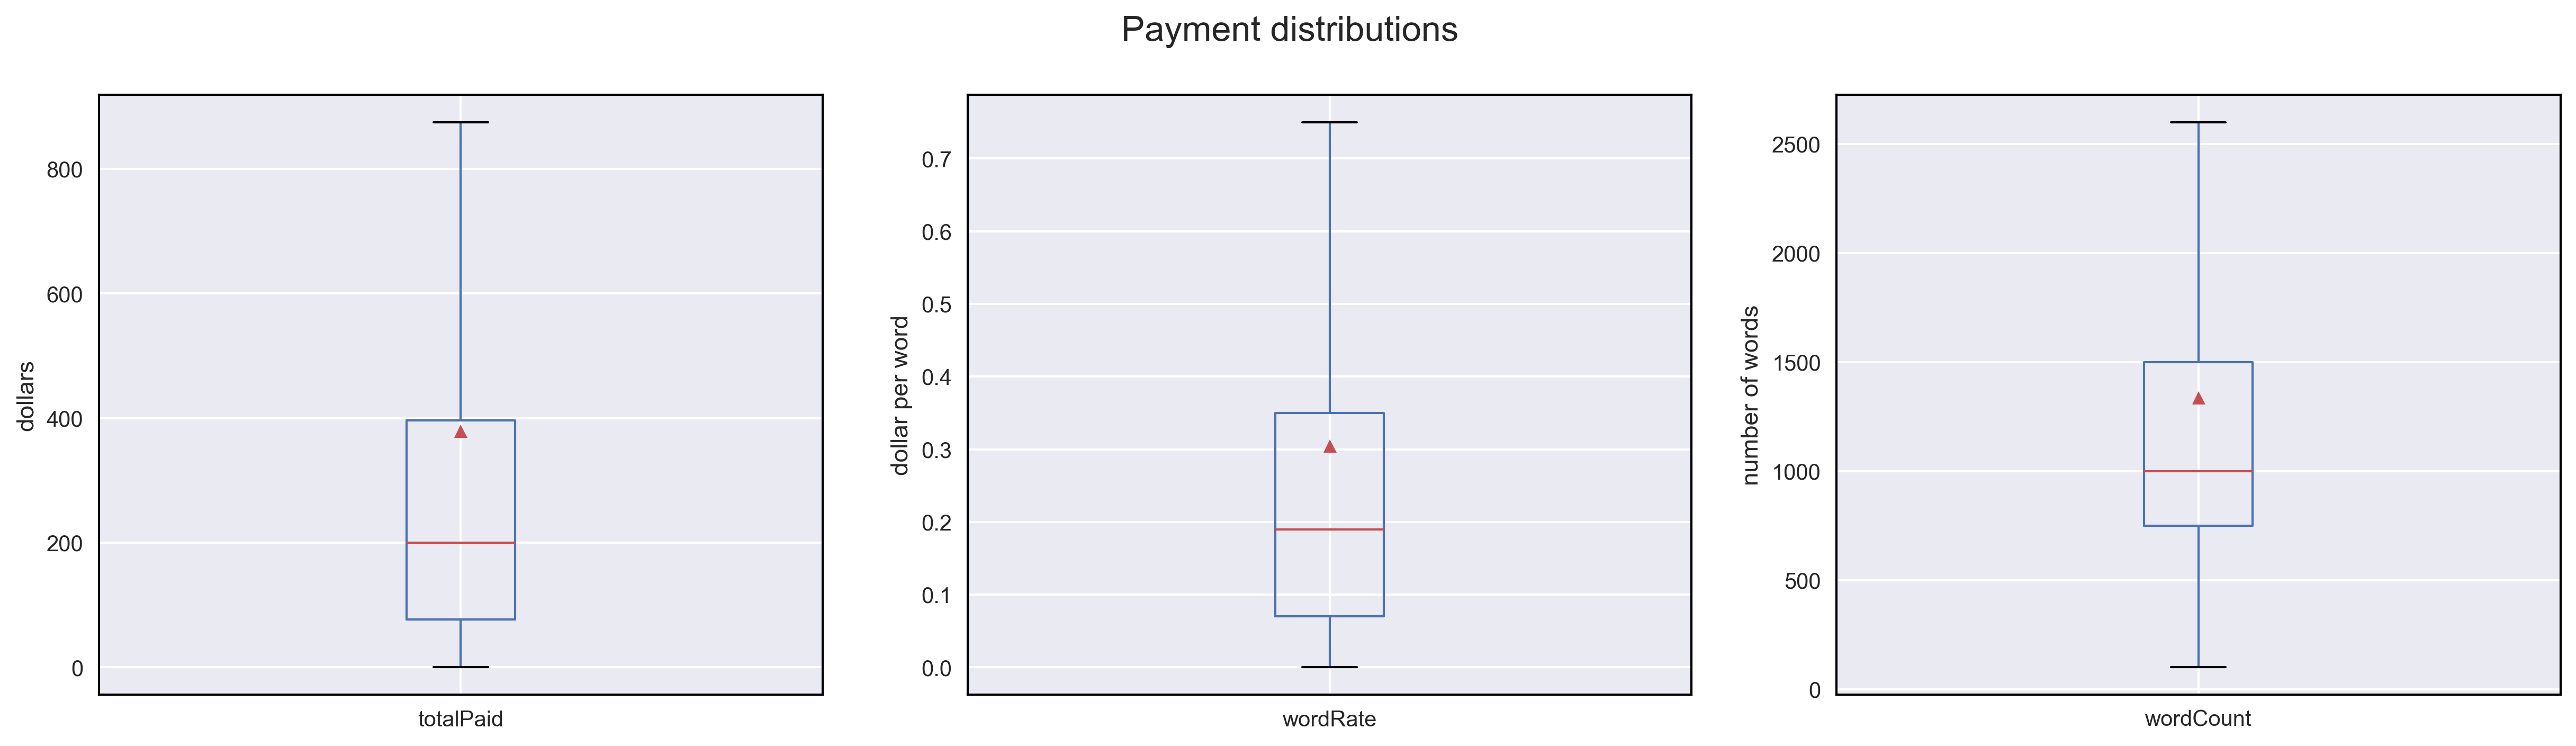

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
fig.suptitle('Payment distributions', fontsize=16)
for i, s in enumerate(num):
    df[s].plot(kind='box', ax=axes[i], showfliers=False, showmeans=True)

axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')

## Two-variable distributions

### By year

Text(0,0.5,'number of words')

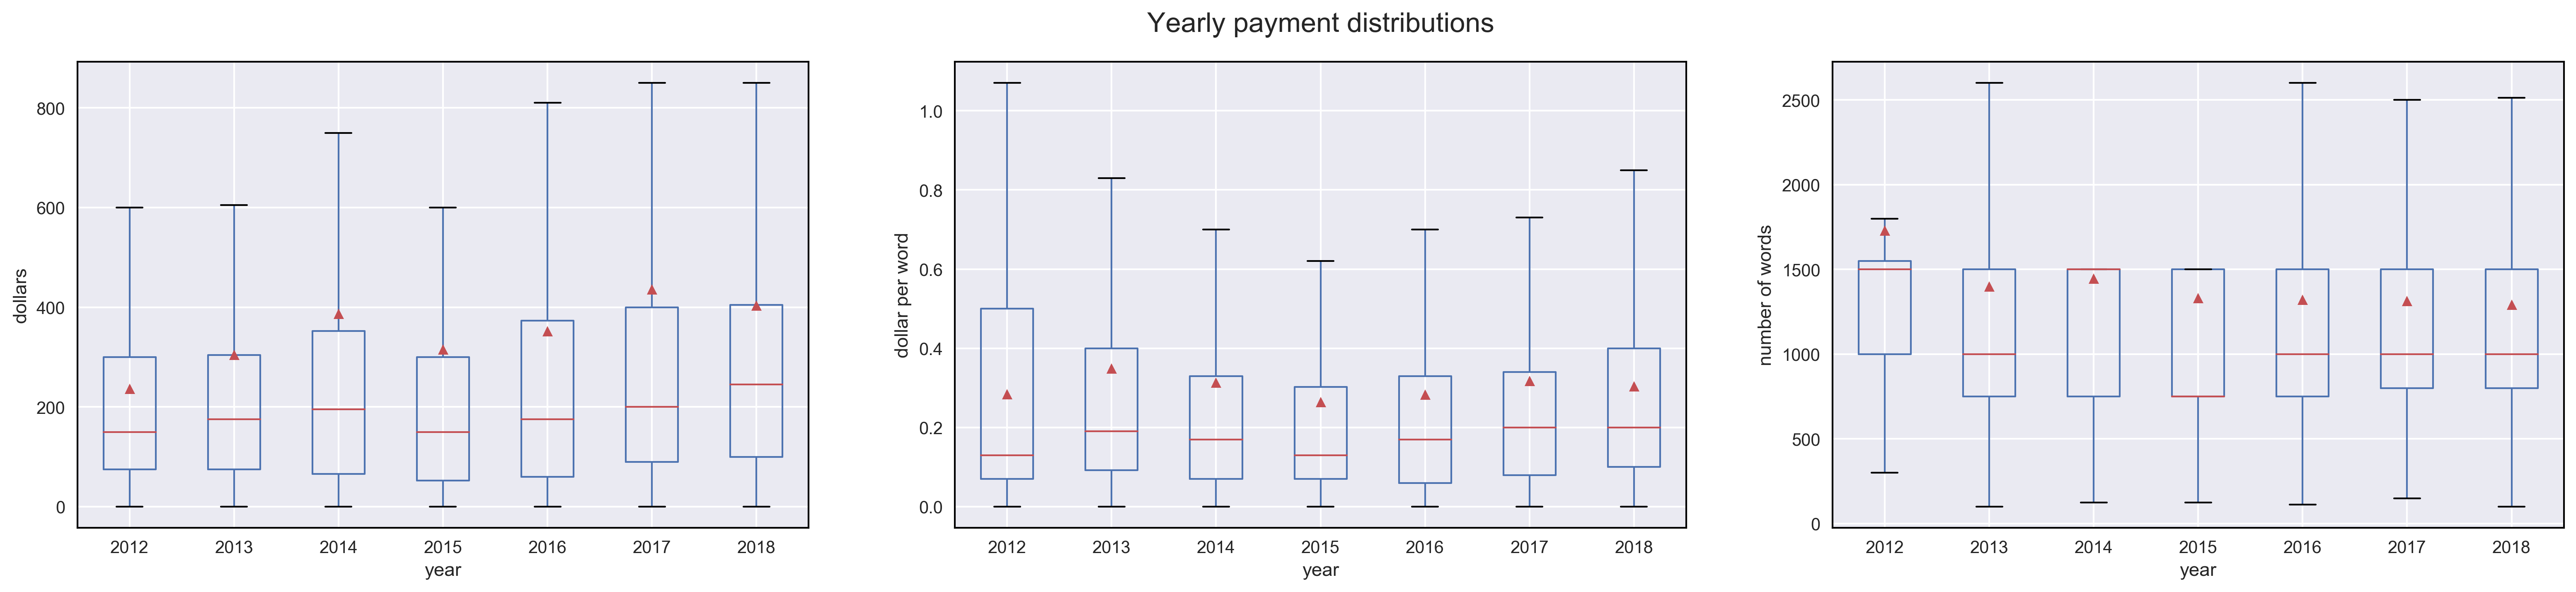

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='year', ax=axes[i], showfliers=False, showmeans=True)
    axes[i].set_title('')

fig.suptitle('Yearly payment distributions', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')

### By paymentDifficulty

Text(0,0.5,'number of words')

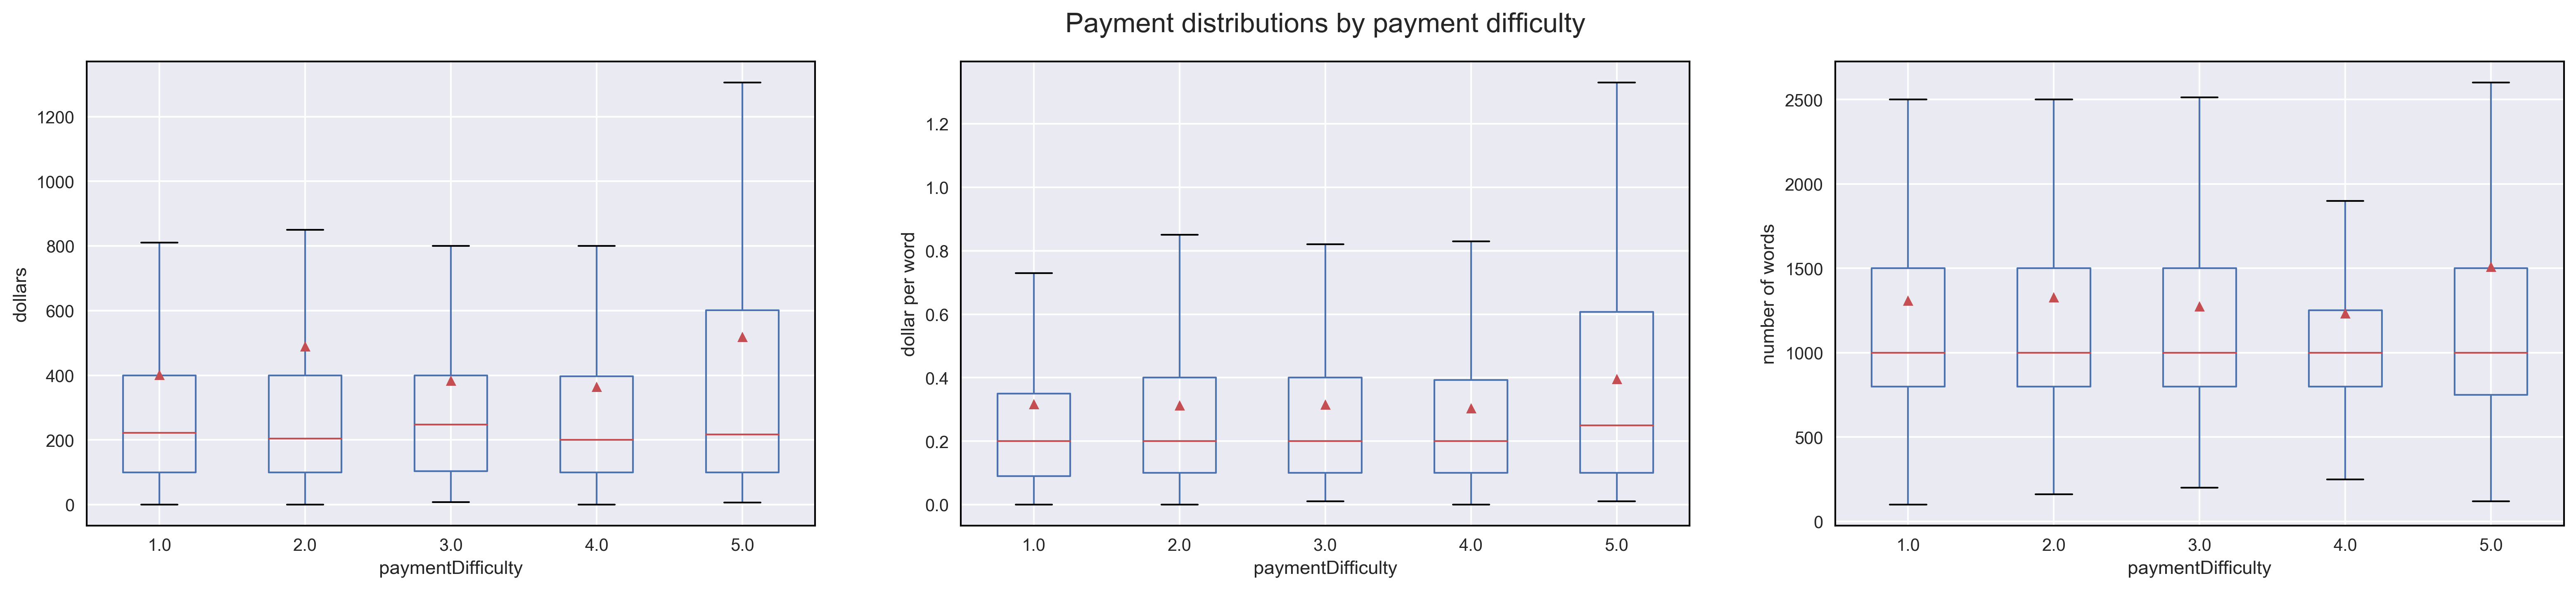

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='paymentDifficulty', ax=axes[i], showfliers=False, showmeans=True)
    axes[i].set_title('')

fig.suptitle('Payment distributions by payment difficulty', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By daysToBePaid

Text(0,0.5,'number of words')

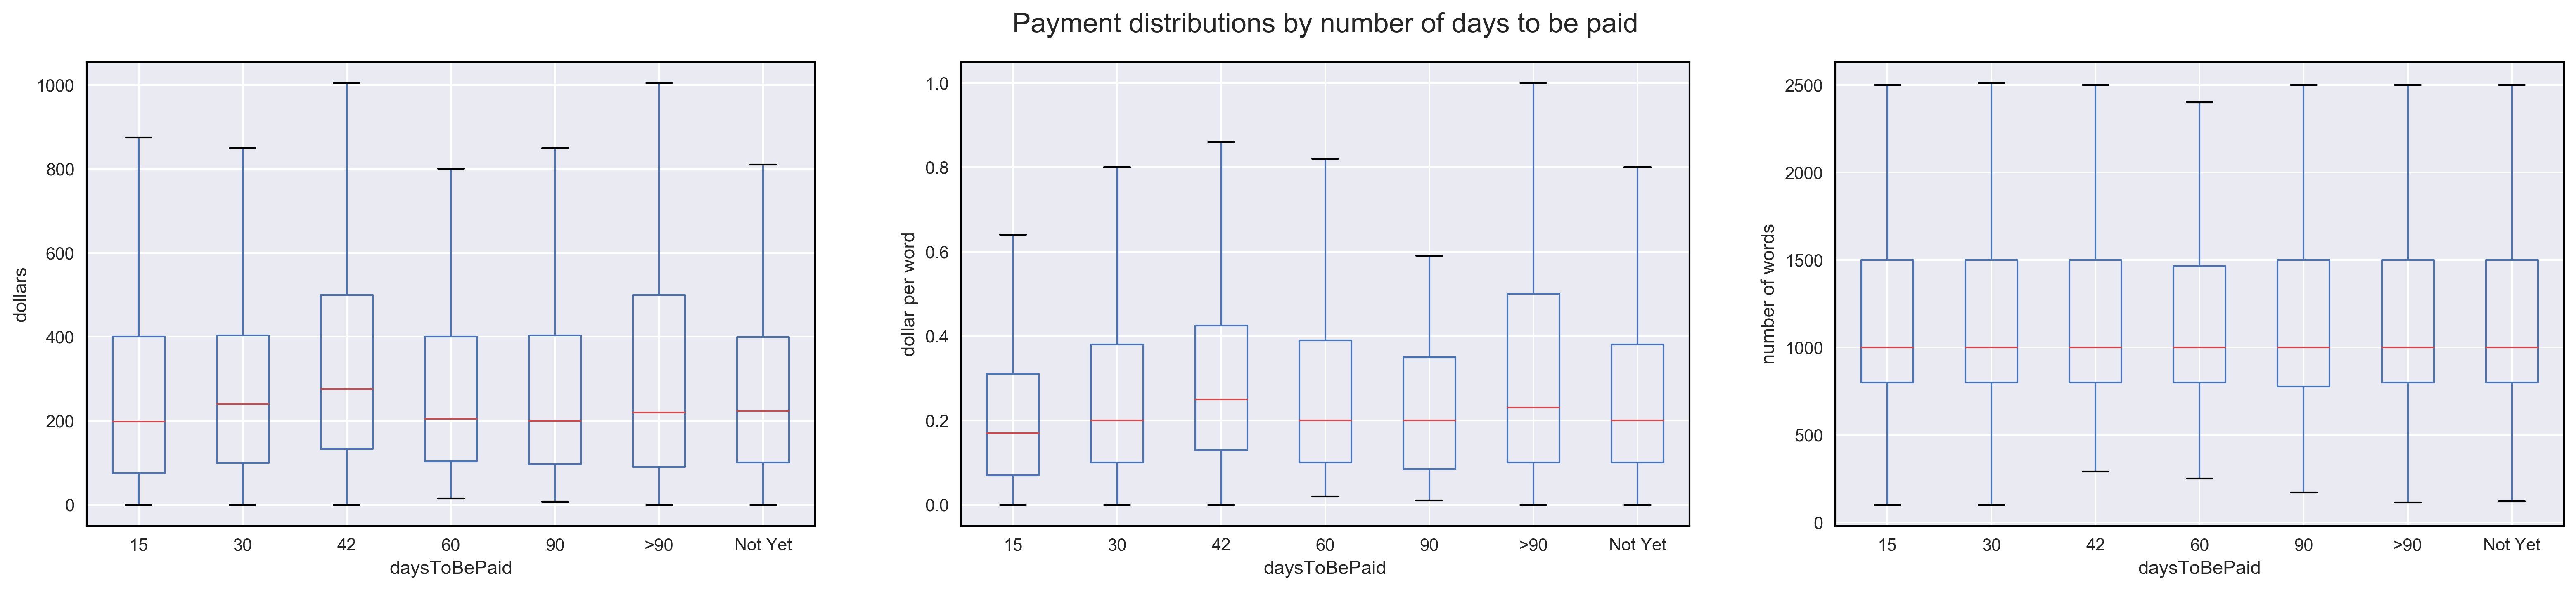

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='daysToBePaid', ax=axes[i], showfliers=False)
    axes[i].set_title('')

fig.suptitle('Payment distributions by number of days to be paid', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By storyType

Text(0,0.5,'number of words')

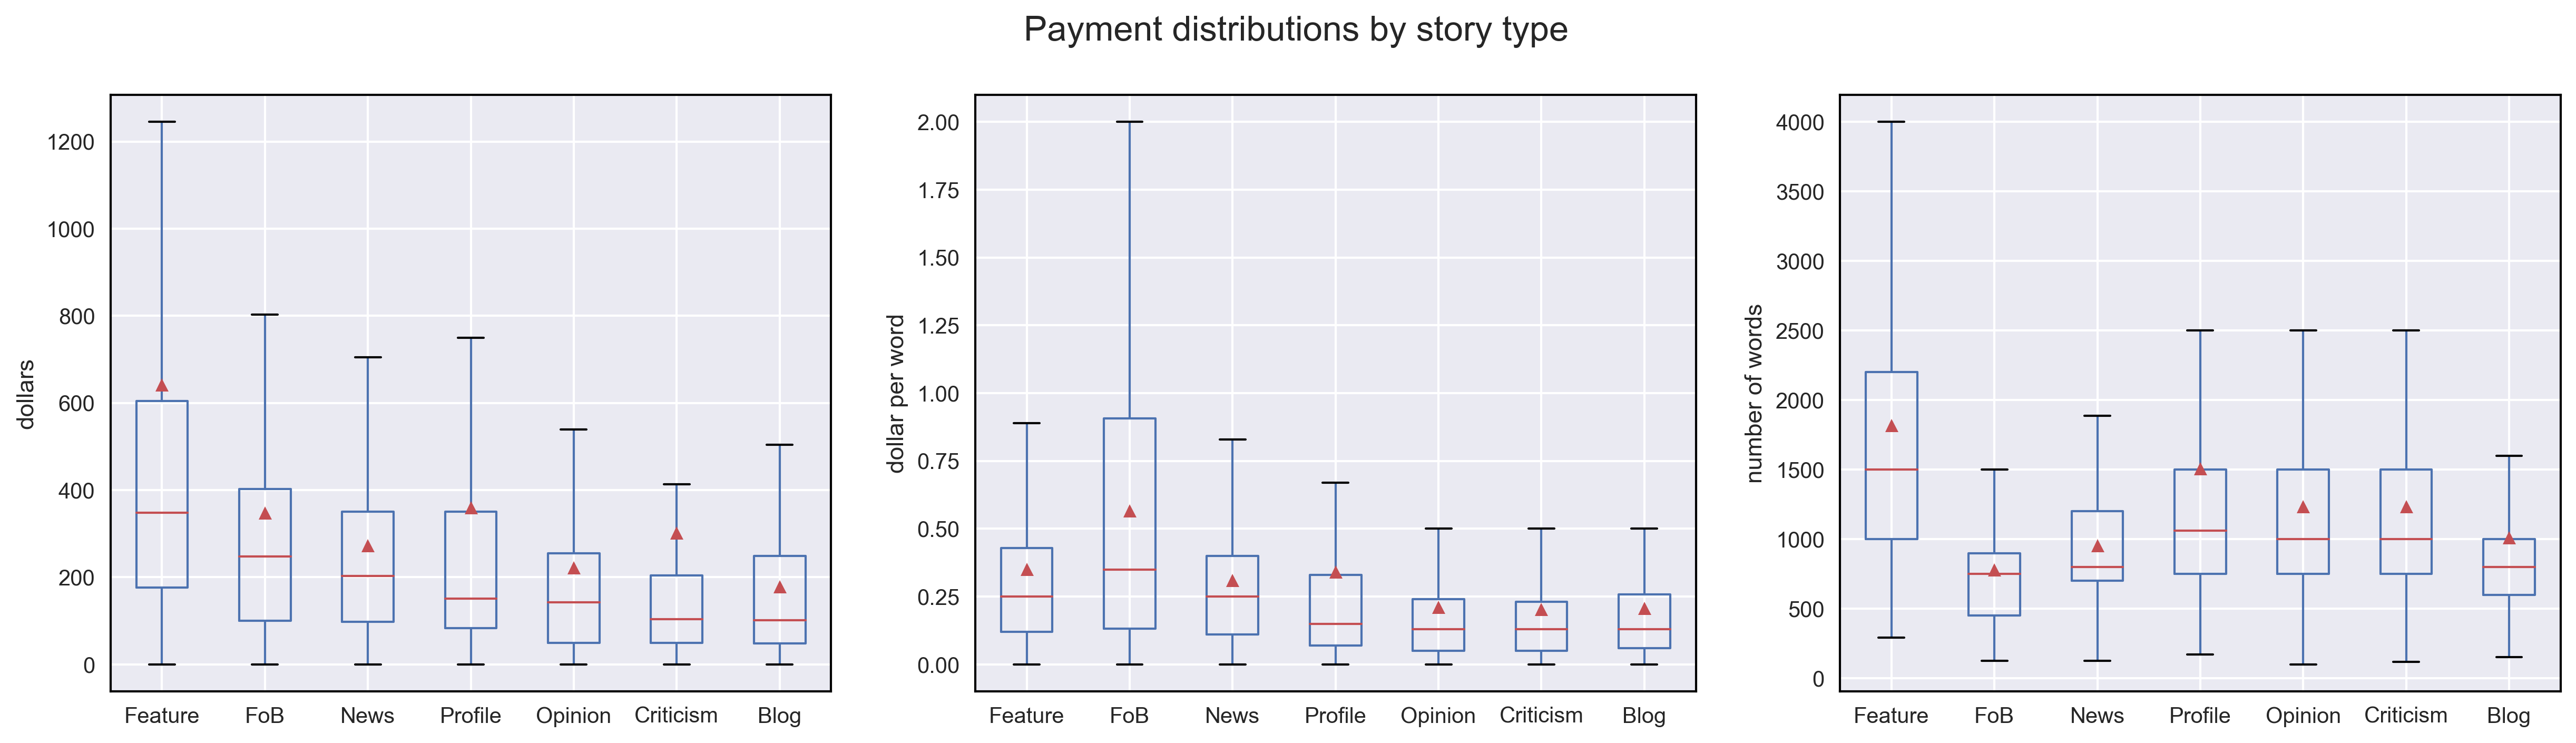

In [48]:
# wow thank you stack overflow
def boxplot_sorted(df, by, column, axe, med_ind=None):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values(ascending=False)
    # for multiple subplots, this option allows to sort by previous medians
    ind = meds.index if (med_ind is None) else med_ind
    df2[ind].boxplot(rot=0, showfliers=False, showmeans=True, ax=axe)
    return ind 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
ind = None
for i, s in enumerate(num):
    ind = boxplot_sorted(df, by='storyType', column=s, axe=axes[i], med_ind=ind)
    axes[i].set_title('')

fig.suptitle('Payment distributions by story type', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')

### By levelOfReporting

Text(0,0.5,'number of words')

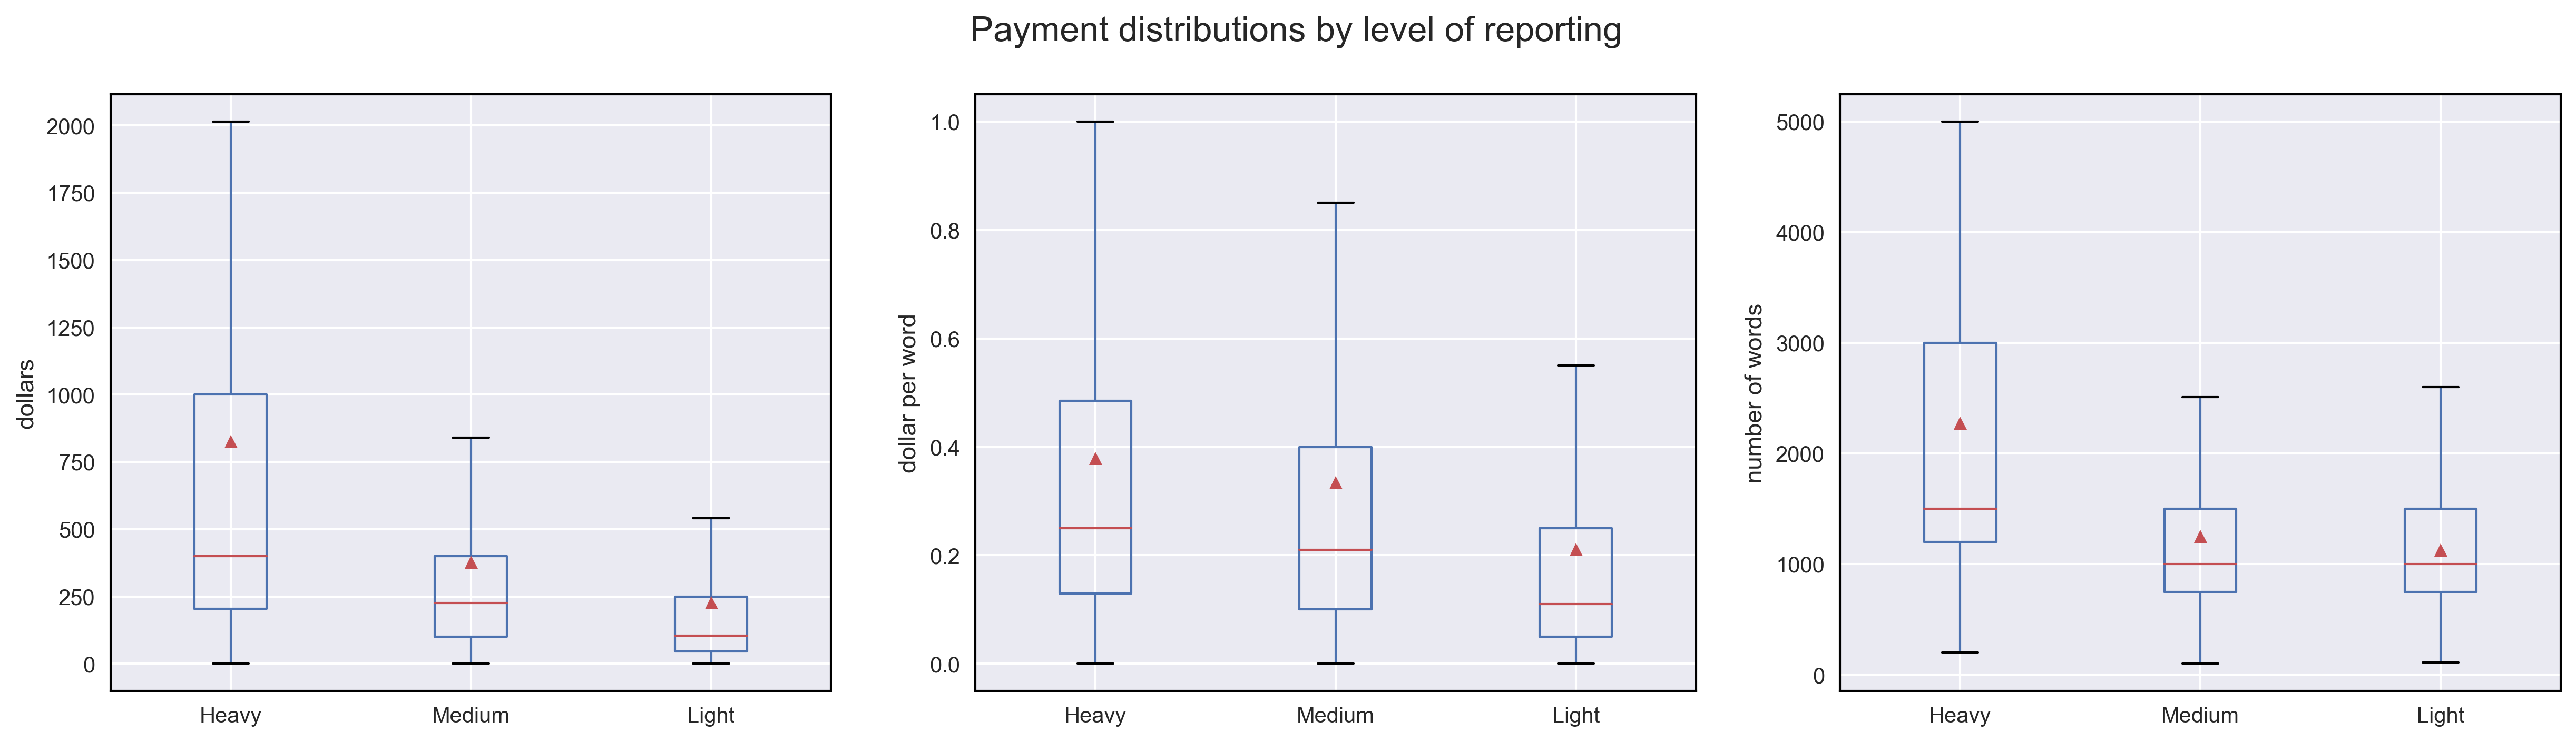

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
for i, s in enumerate(num):
    boxplot_sorted(df, by='levelOfReporting', column=s, axe=axes[i])
    axes[i].set_title('')

fig.suptitle('Payment distributions by level of reporting', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By relationship

Text(0,0.5,'number of words')

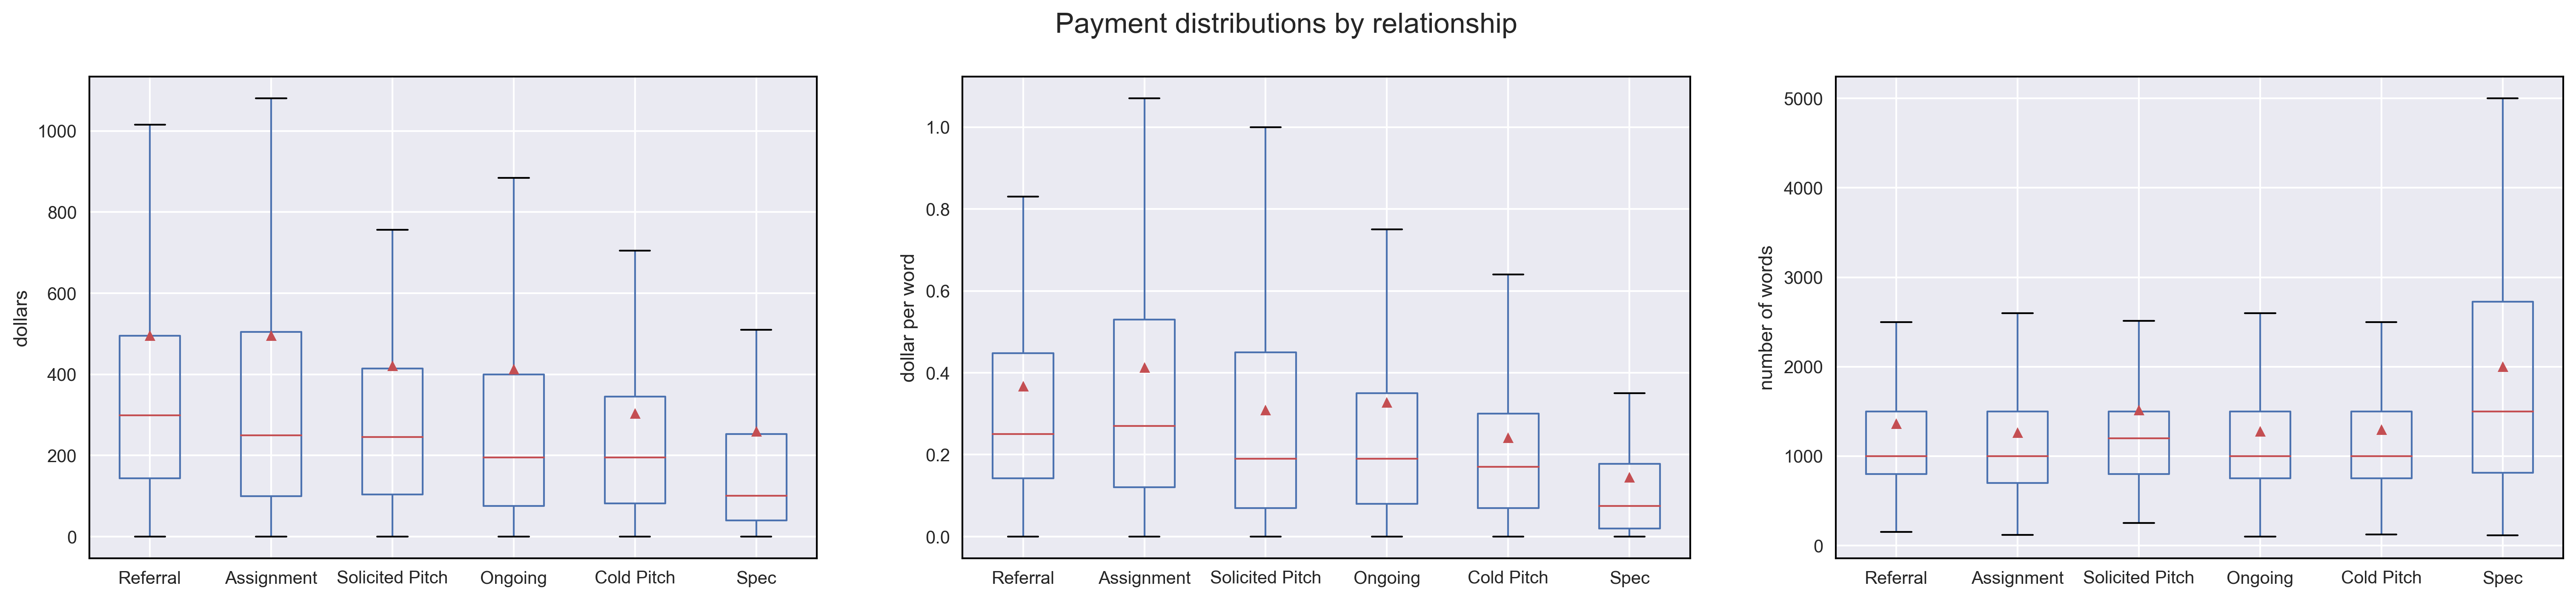

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (25, 5))
ind = None
for i, s in enumerate(num):
    ind = boxplot_sorted(df, by='relationship', column=s, axe=axes[i], med_ind=ind)
    axes[i].set_title('')

fig.suptitle('Payment distributions by relationship', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By rights

Text(0,0.5,'number of words')

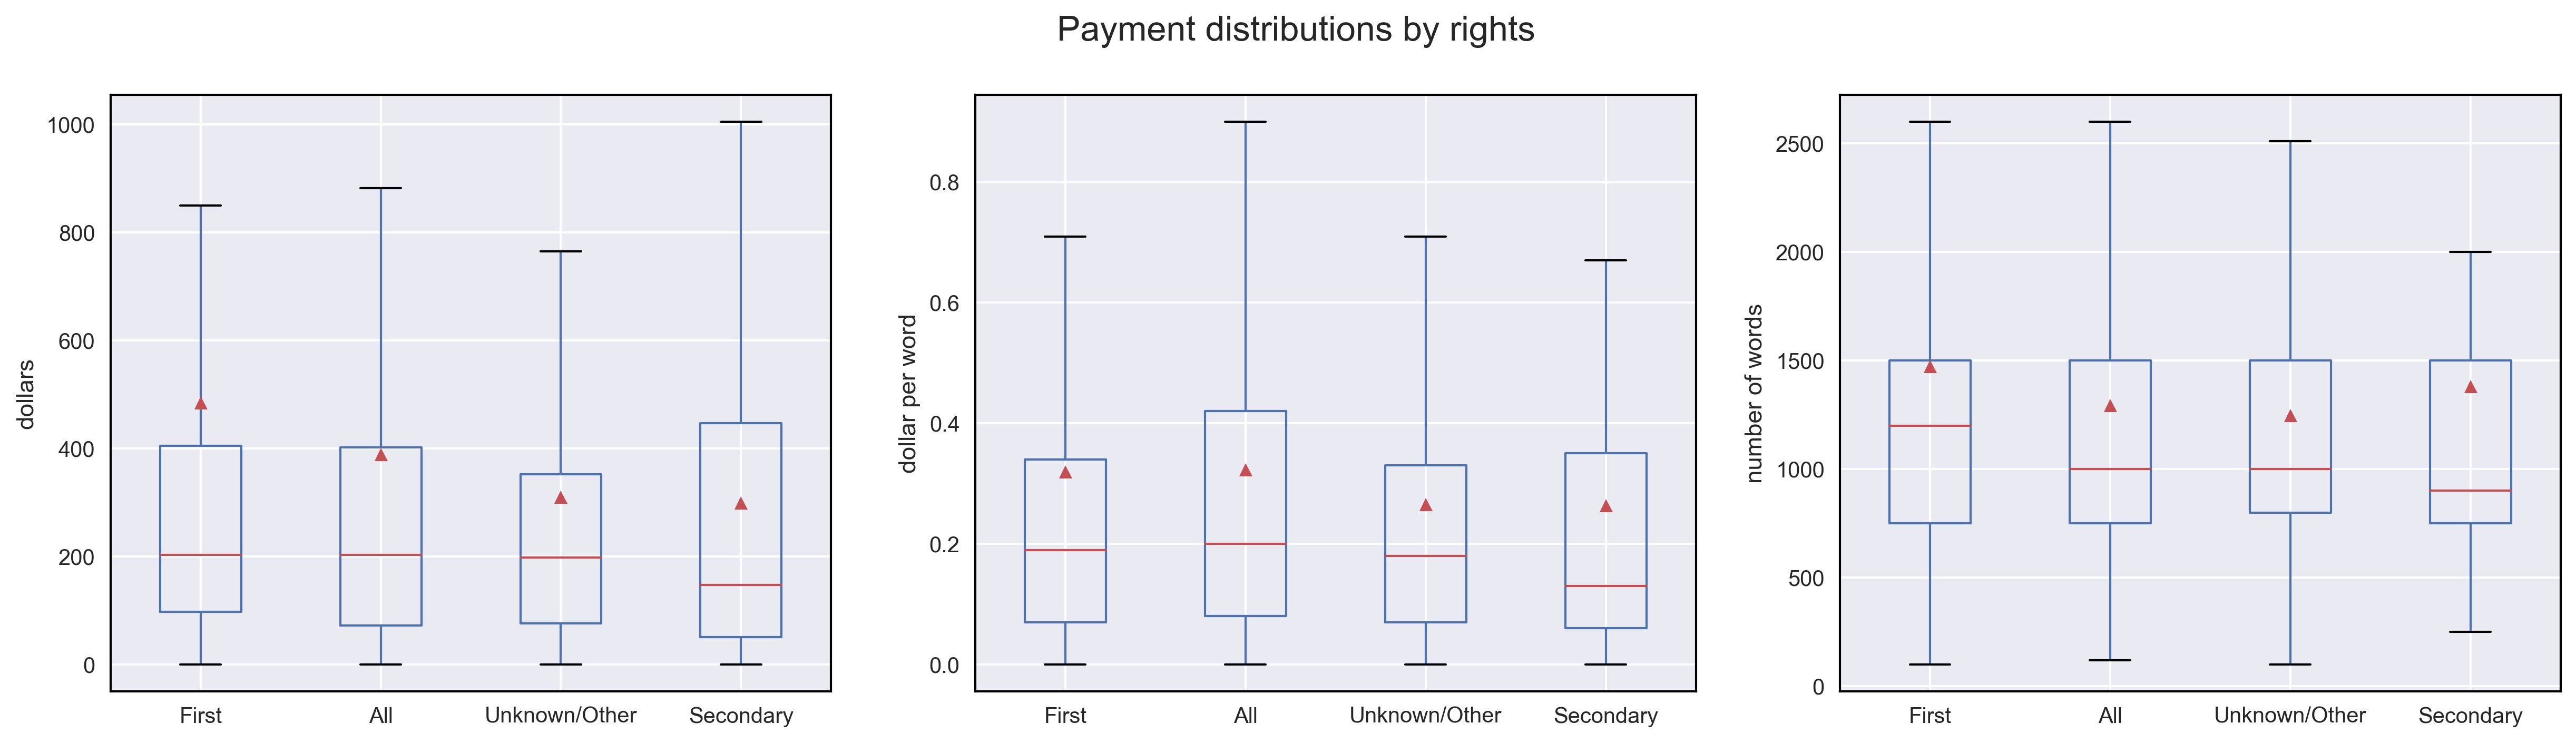

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
ind = None
for i, s in enumerate(num):
    ind = boxplot_sorted(df, by='rights', column=s, axe=axes[i], med_ind=ind)
    axes[i].set_title('')

fig.suptitle('Payment distributions by rights', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By platform

Text(0,0.5,'number of words')

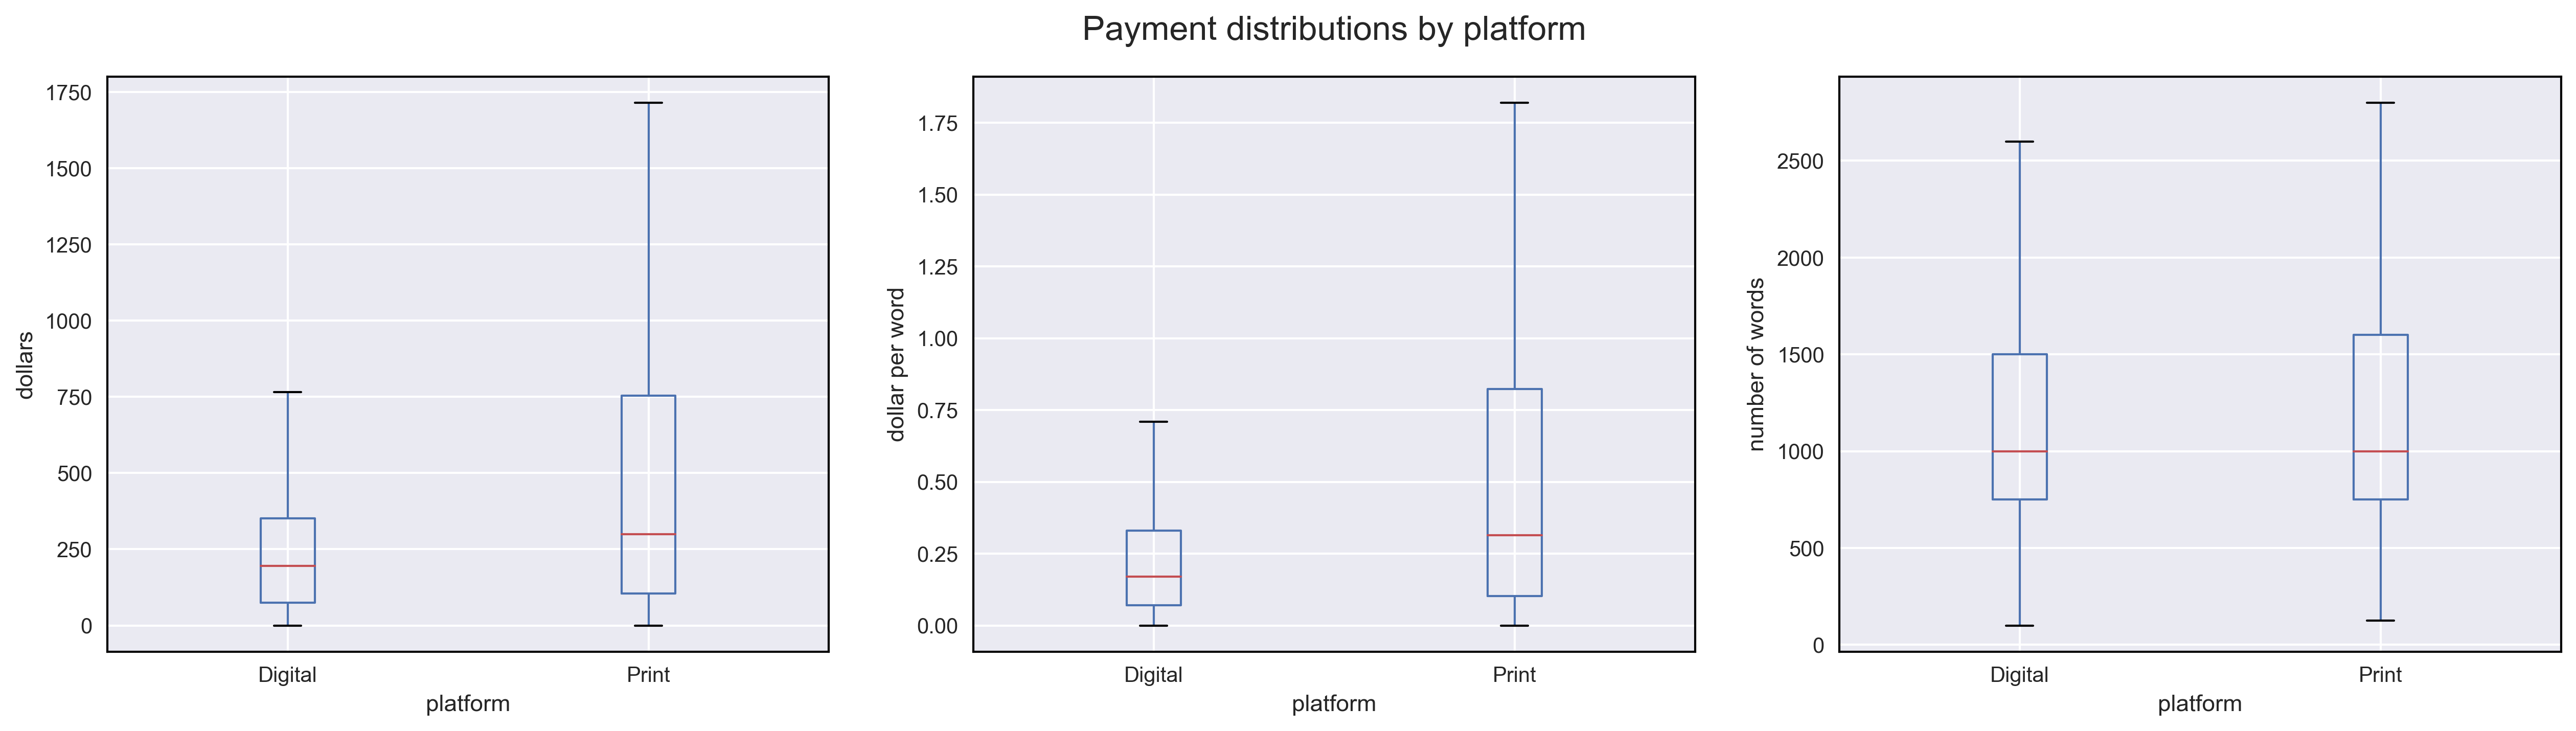

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='platform', ax=axes[i], showfliers=False, rot=0)
    axes[i].set_title('')

fig.suptitle('Payment distributions by platform', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


### By contract

Text(0,0.5,'number of words')

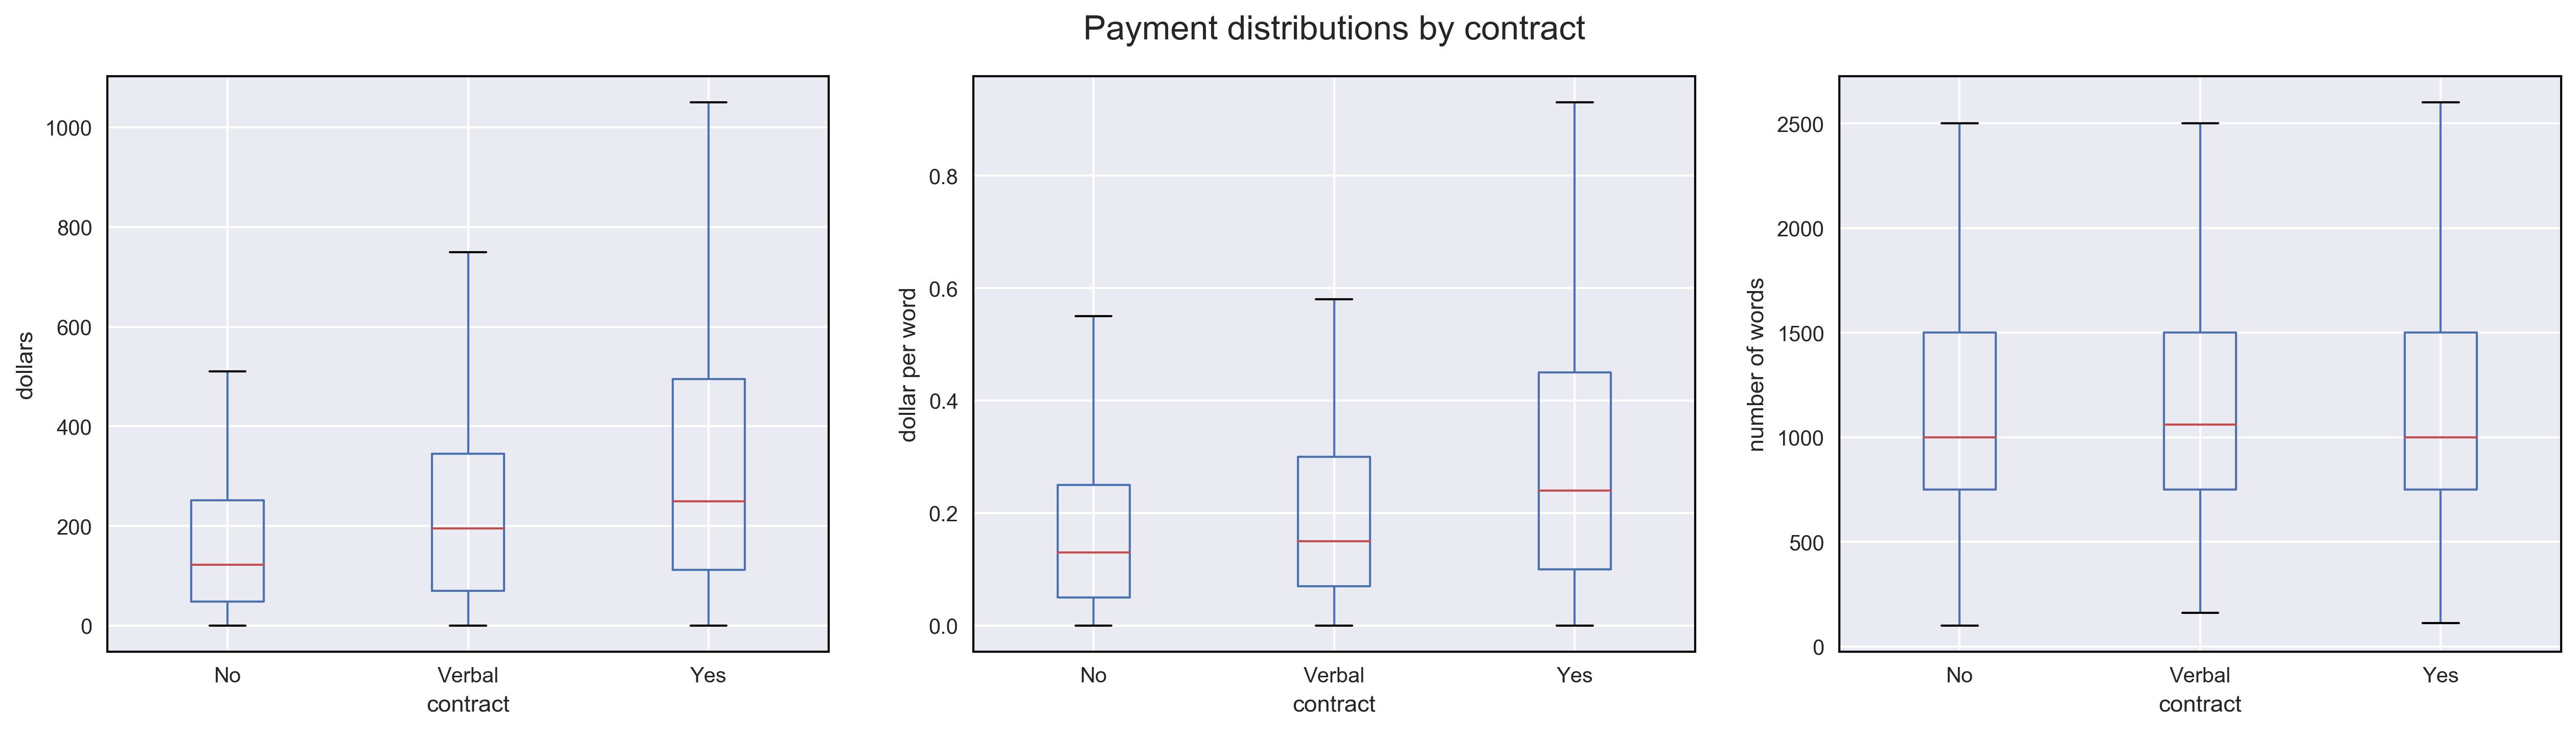

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
for i, s in enumerate(num):
    df.boxplot(column=s, by='contract', ax=axes[i], showfliers=False, rot=0)
    axes[i].set_title('')

fig.suptitle('Payment distributions by contract', fontsize=16)
axes[0].set_ylabel('dollars')
axes[1].set_ylabel('dollar per word') 
axes[2].set_ylabel('number of words')


***
# Categorical data

## Independent distributions

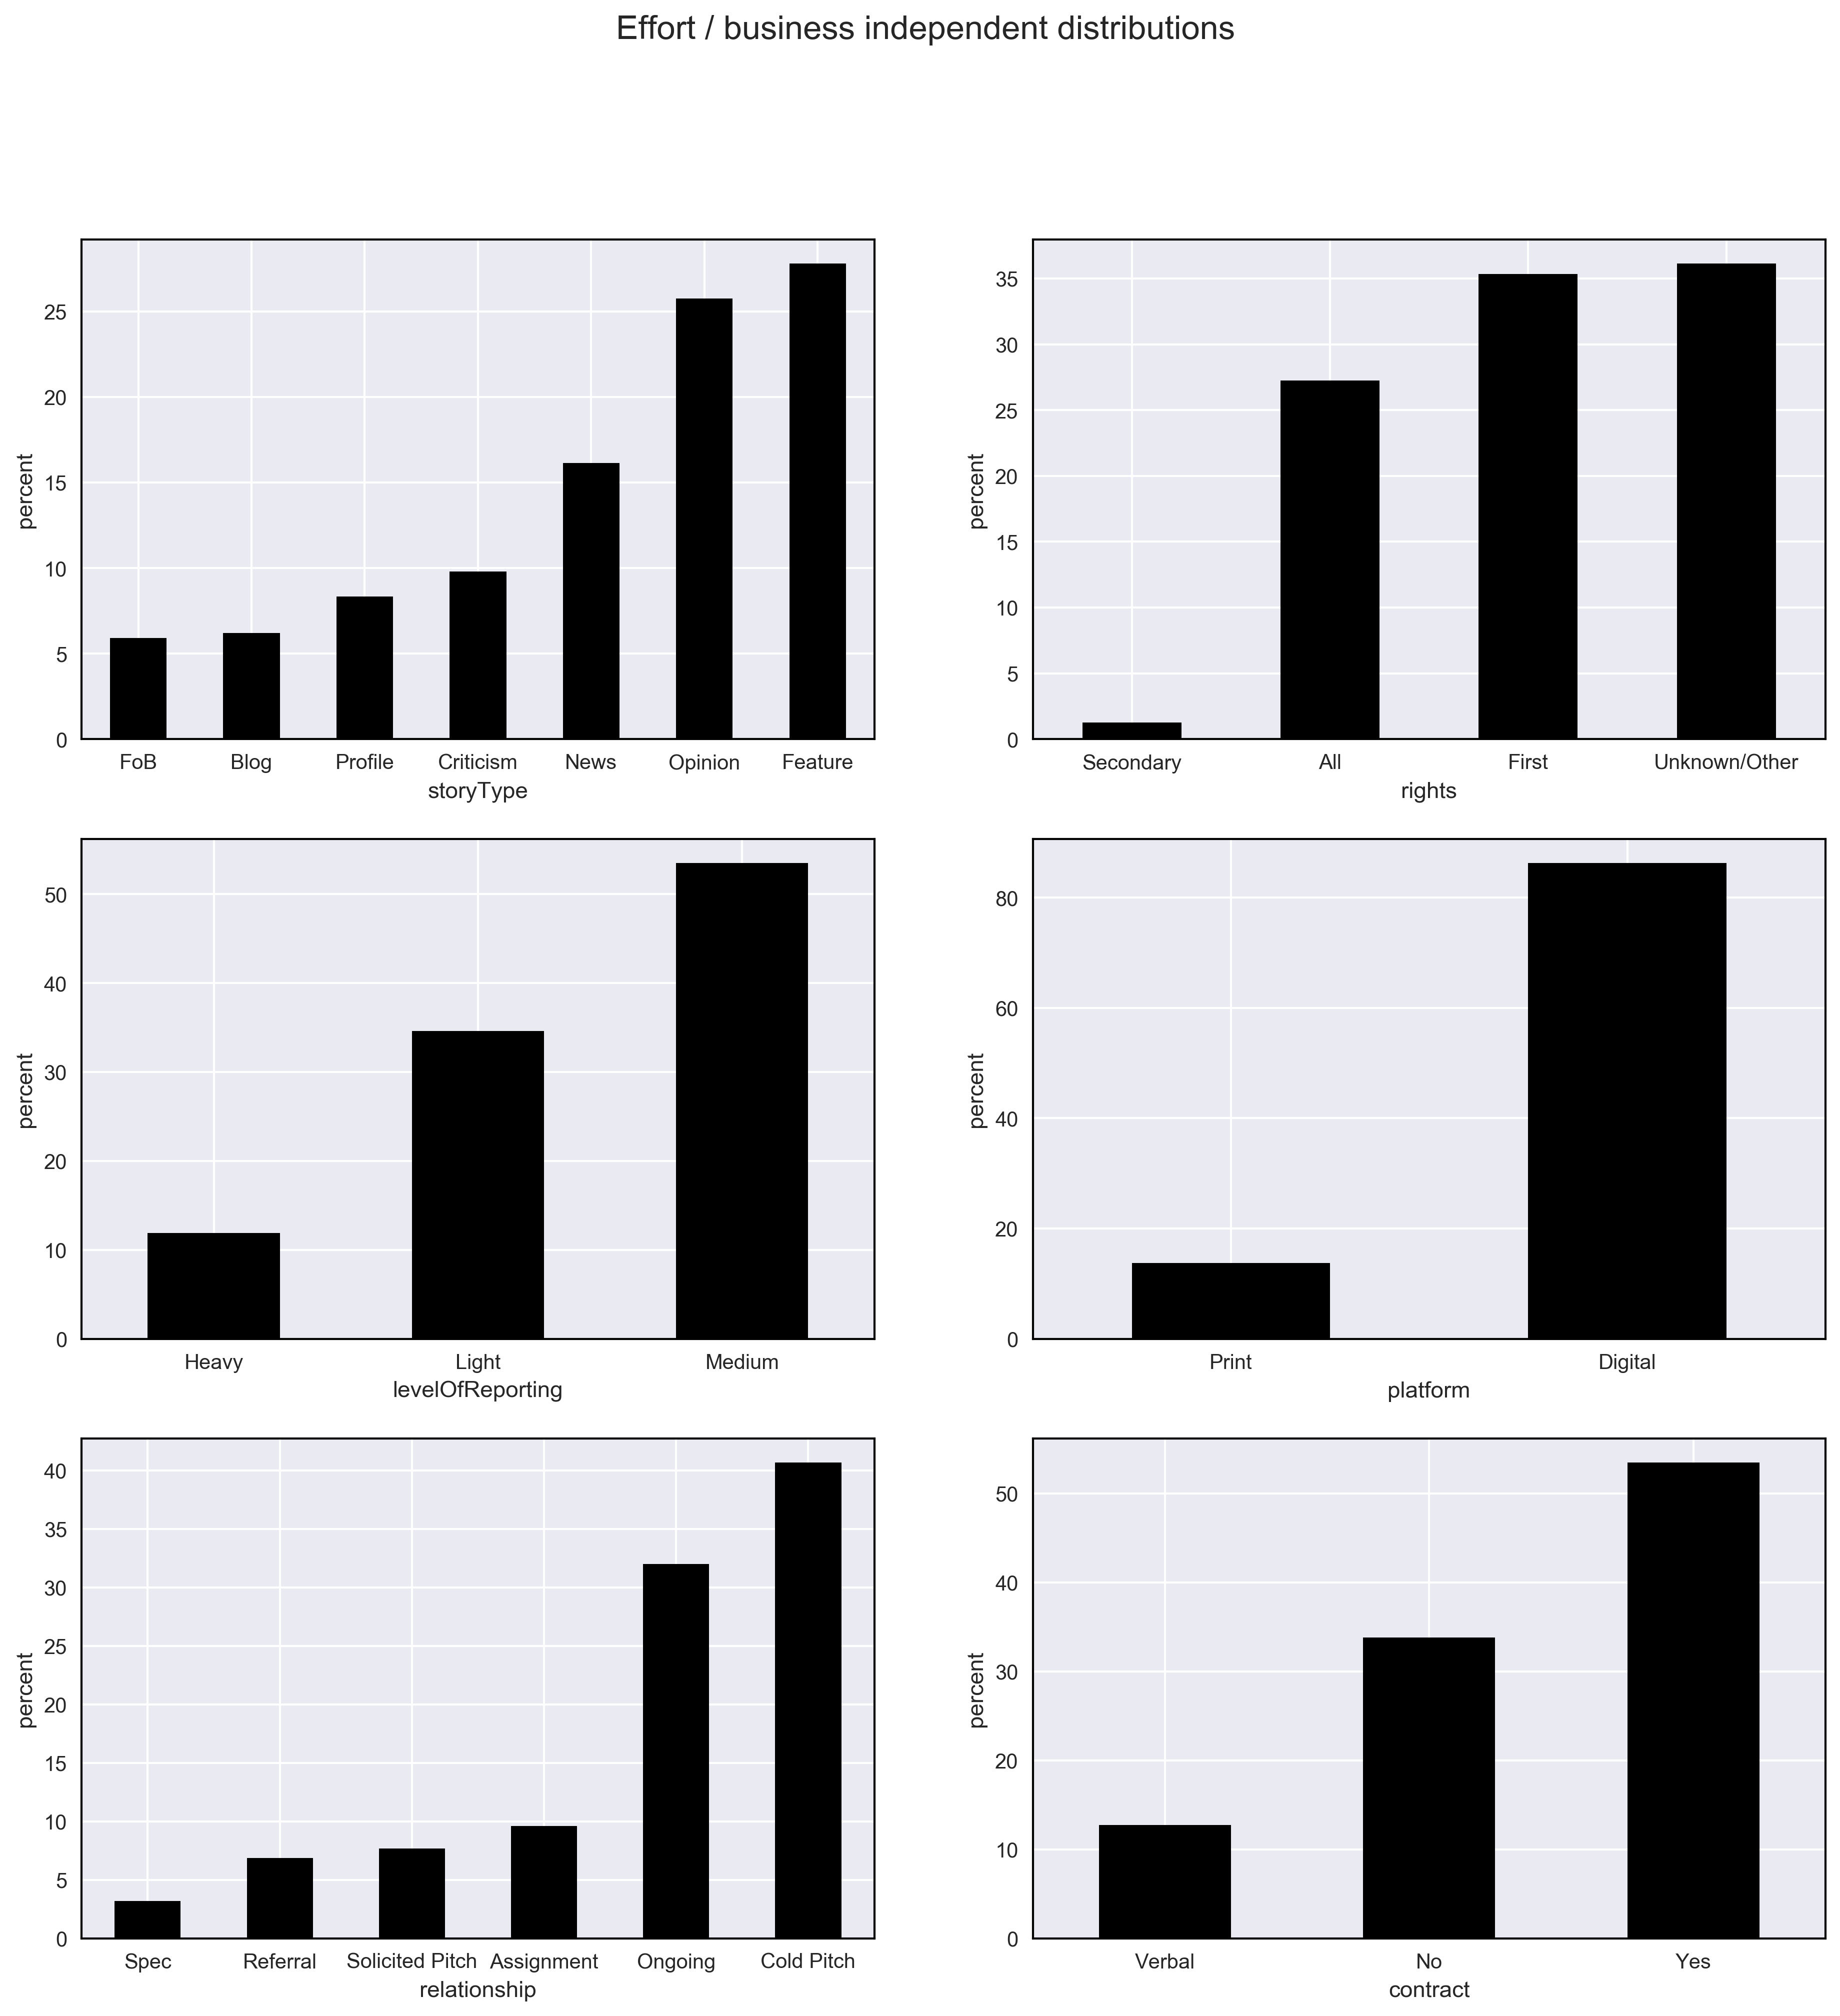

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (15, 15))
fig.suptitle("Effort / business independent distributions", fontsize=16)

eb1 = ['storyType', 'levelOfReporting', 'relationship']
eb2 = ['rights', 'platform', 'contract']
for i, p in enumerate(eb1):
    norm = df[p].count()
    ax1 = (df.groupby(p)[p].count().sort_values()/norm*100).plot(
        kind='bar', ax=axes[i, 0], rot=0, color='k')
    ax1.set_ylabel('percent')
for i, p in enumerate(eb2):
    norm = df[p].count()
    ax2 = (df.groupby(p)[p].count().sort_values()/norm*100).plot(
        kind='bar', ax=axes[i, 1], rot=0, color='k')
    ax2.set_ylabel('percent')


daysToBePaid
15     27.287946
30     37.555804
42     13.783482
60     10.435268
90      6.194196
>90     4.743304
Name: daysToBePaid, dtype: float64


Text(0,0.5,'percent')

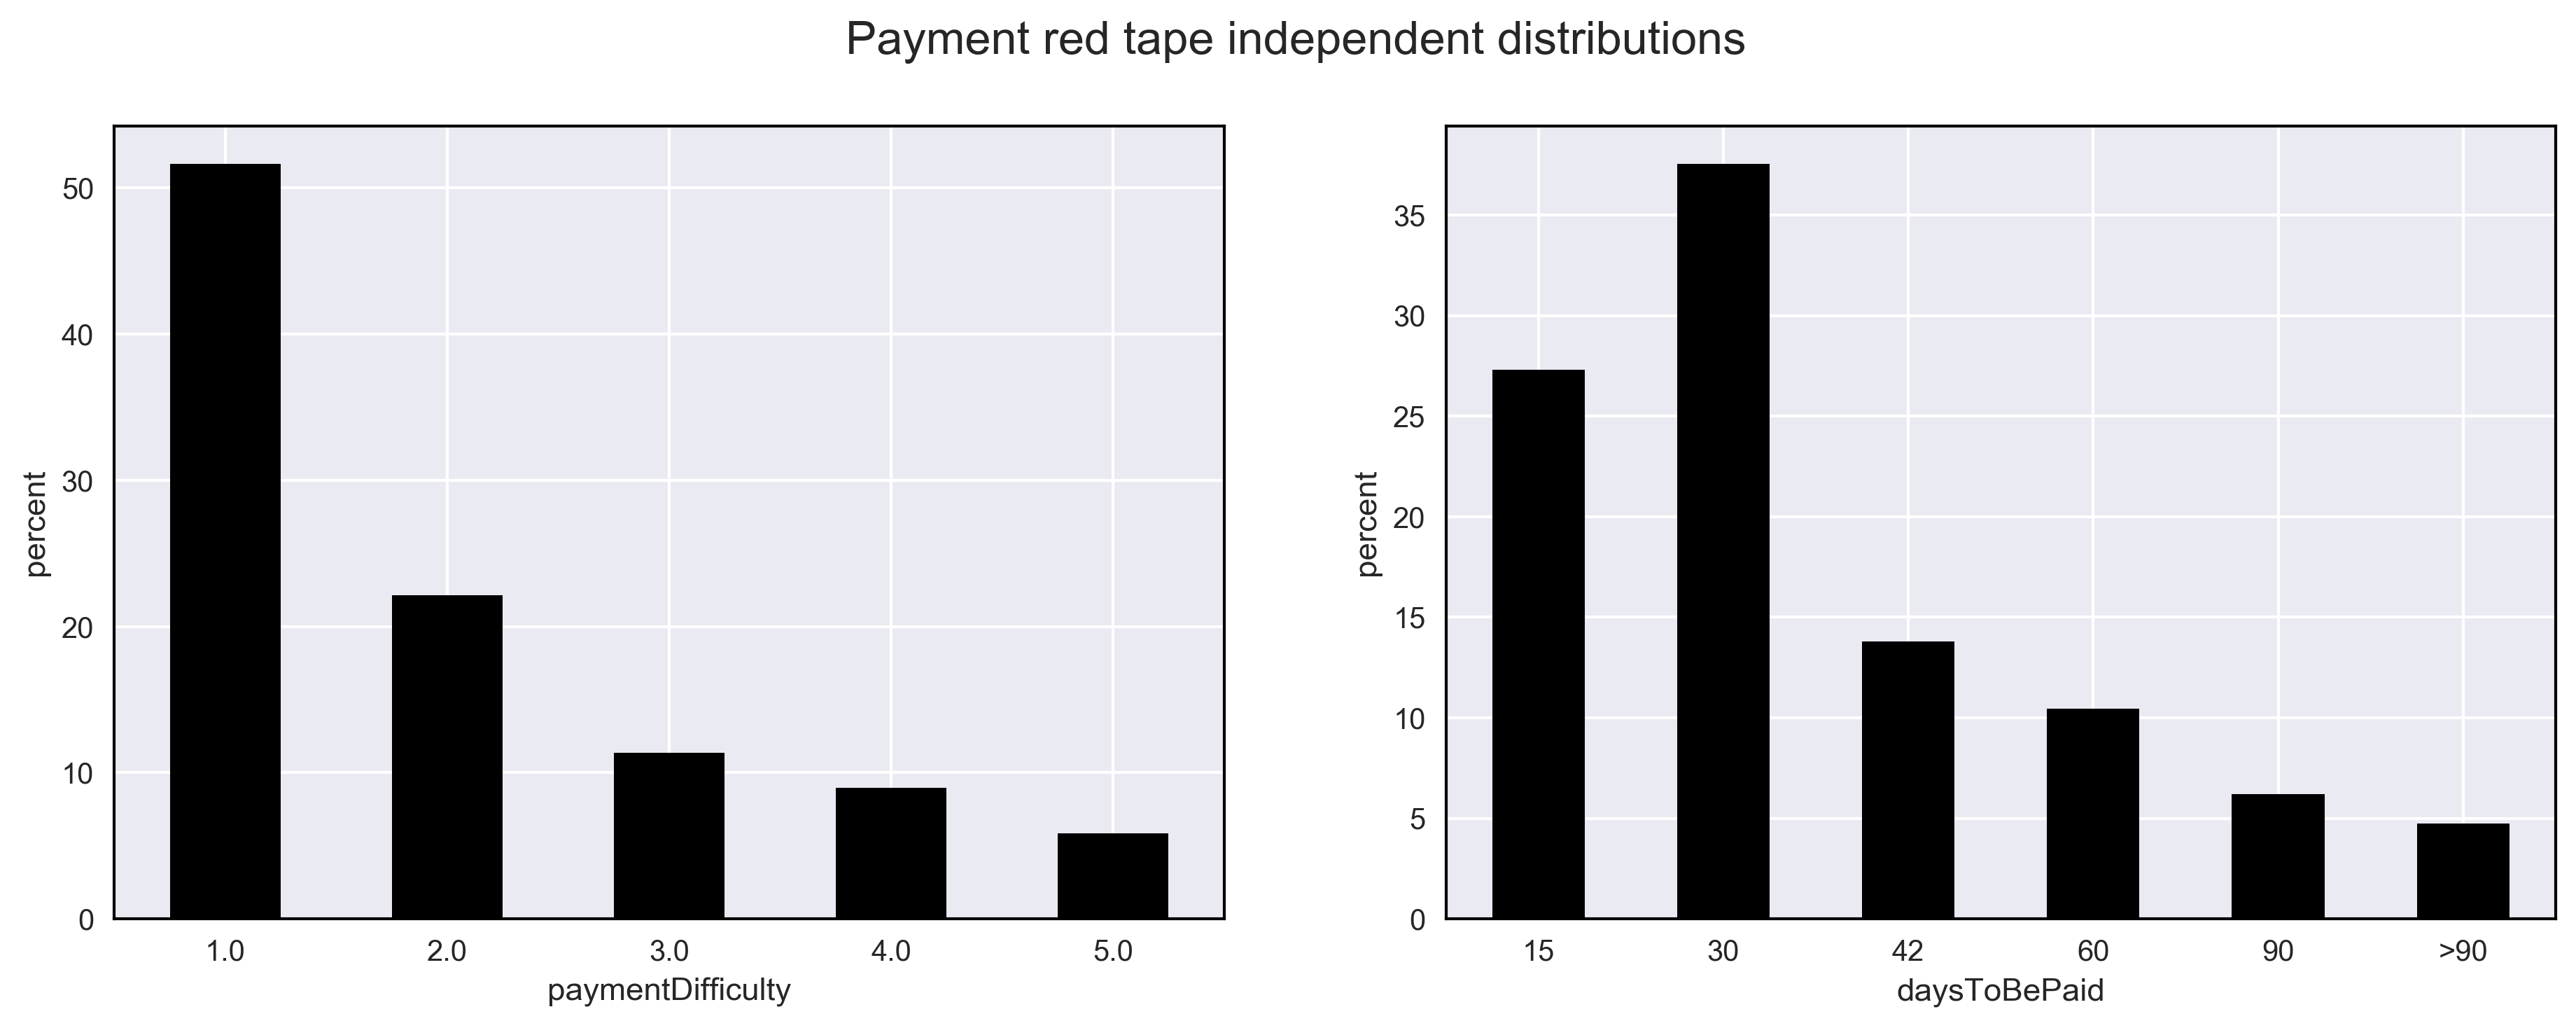

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

n1 = df['paymentDifficulty'].count()
df_ny = df[df['daysToBePaid'] != 'Not Yet']
n2 = df_ny['daysToBePaid'].count()

(df.groupby('paymentDifficulty')['paymentDifficulty'].count()/n1*100).plot(kind='bar',  ax=axes[0], color='k', rot=0)
(df_ny.groupby('daysToBePaid')['daysToBePaid'].count()/n2*100).plot(kind='bar', ax=axes[1], color='k', rot=0)
print(df_ny.groupby('daysToBePaid')['daysToBePaid'].count()/n2*100)
fig.suptitle('Payment red tape independent distributions', fontsize=16)
axes[0].set_ylabel('percent')
axes[1].set_ylabel('percent')

## Two-variable distributions

In [56]:
def create_stacked(df, column, by, axes, sort_by=None, palette=sns.color_palette("coolwarm", 7)):
    uq = sorted(df[column].dropna().unique(), reverse=True)
    di = {}
    for u in uq:
        df_n = df[df[column] == u]
        N = df_n[by].count()
        di[u] = dict(df_n.groupby(by)[by].count() / N * 100)

    df_t = pd.DataFrame(di)
    df_tT = df_t.T
    if not sort_by is None:
        df_tT.sort_values(by=[sort_by], inplace=True)
    axes.set_xlim(0, 100)  
    df_tT.plot(kind='barh', stacked=True, rot=0,
                 colormap=ListedColormap(palette), ax=axes)
    axes.legend(frameon=True)

### By year

Payment difficulty and pay wait was only added four years ago. Results are inconclusive

Text(0.5,0,'percent rights')

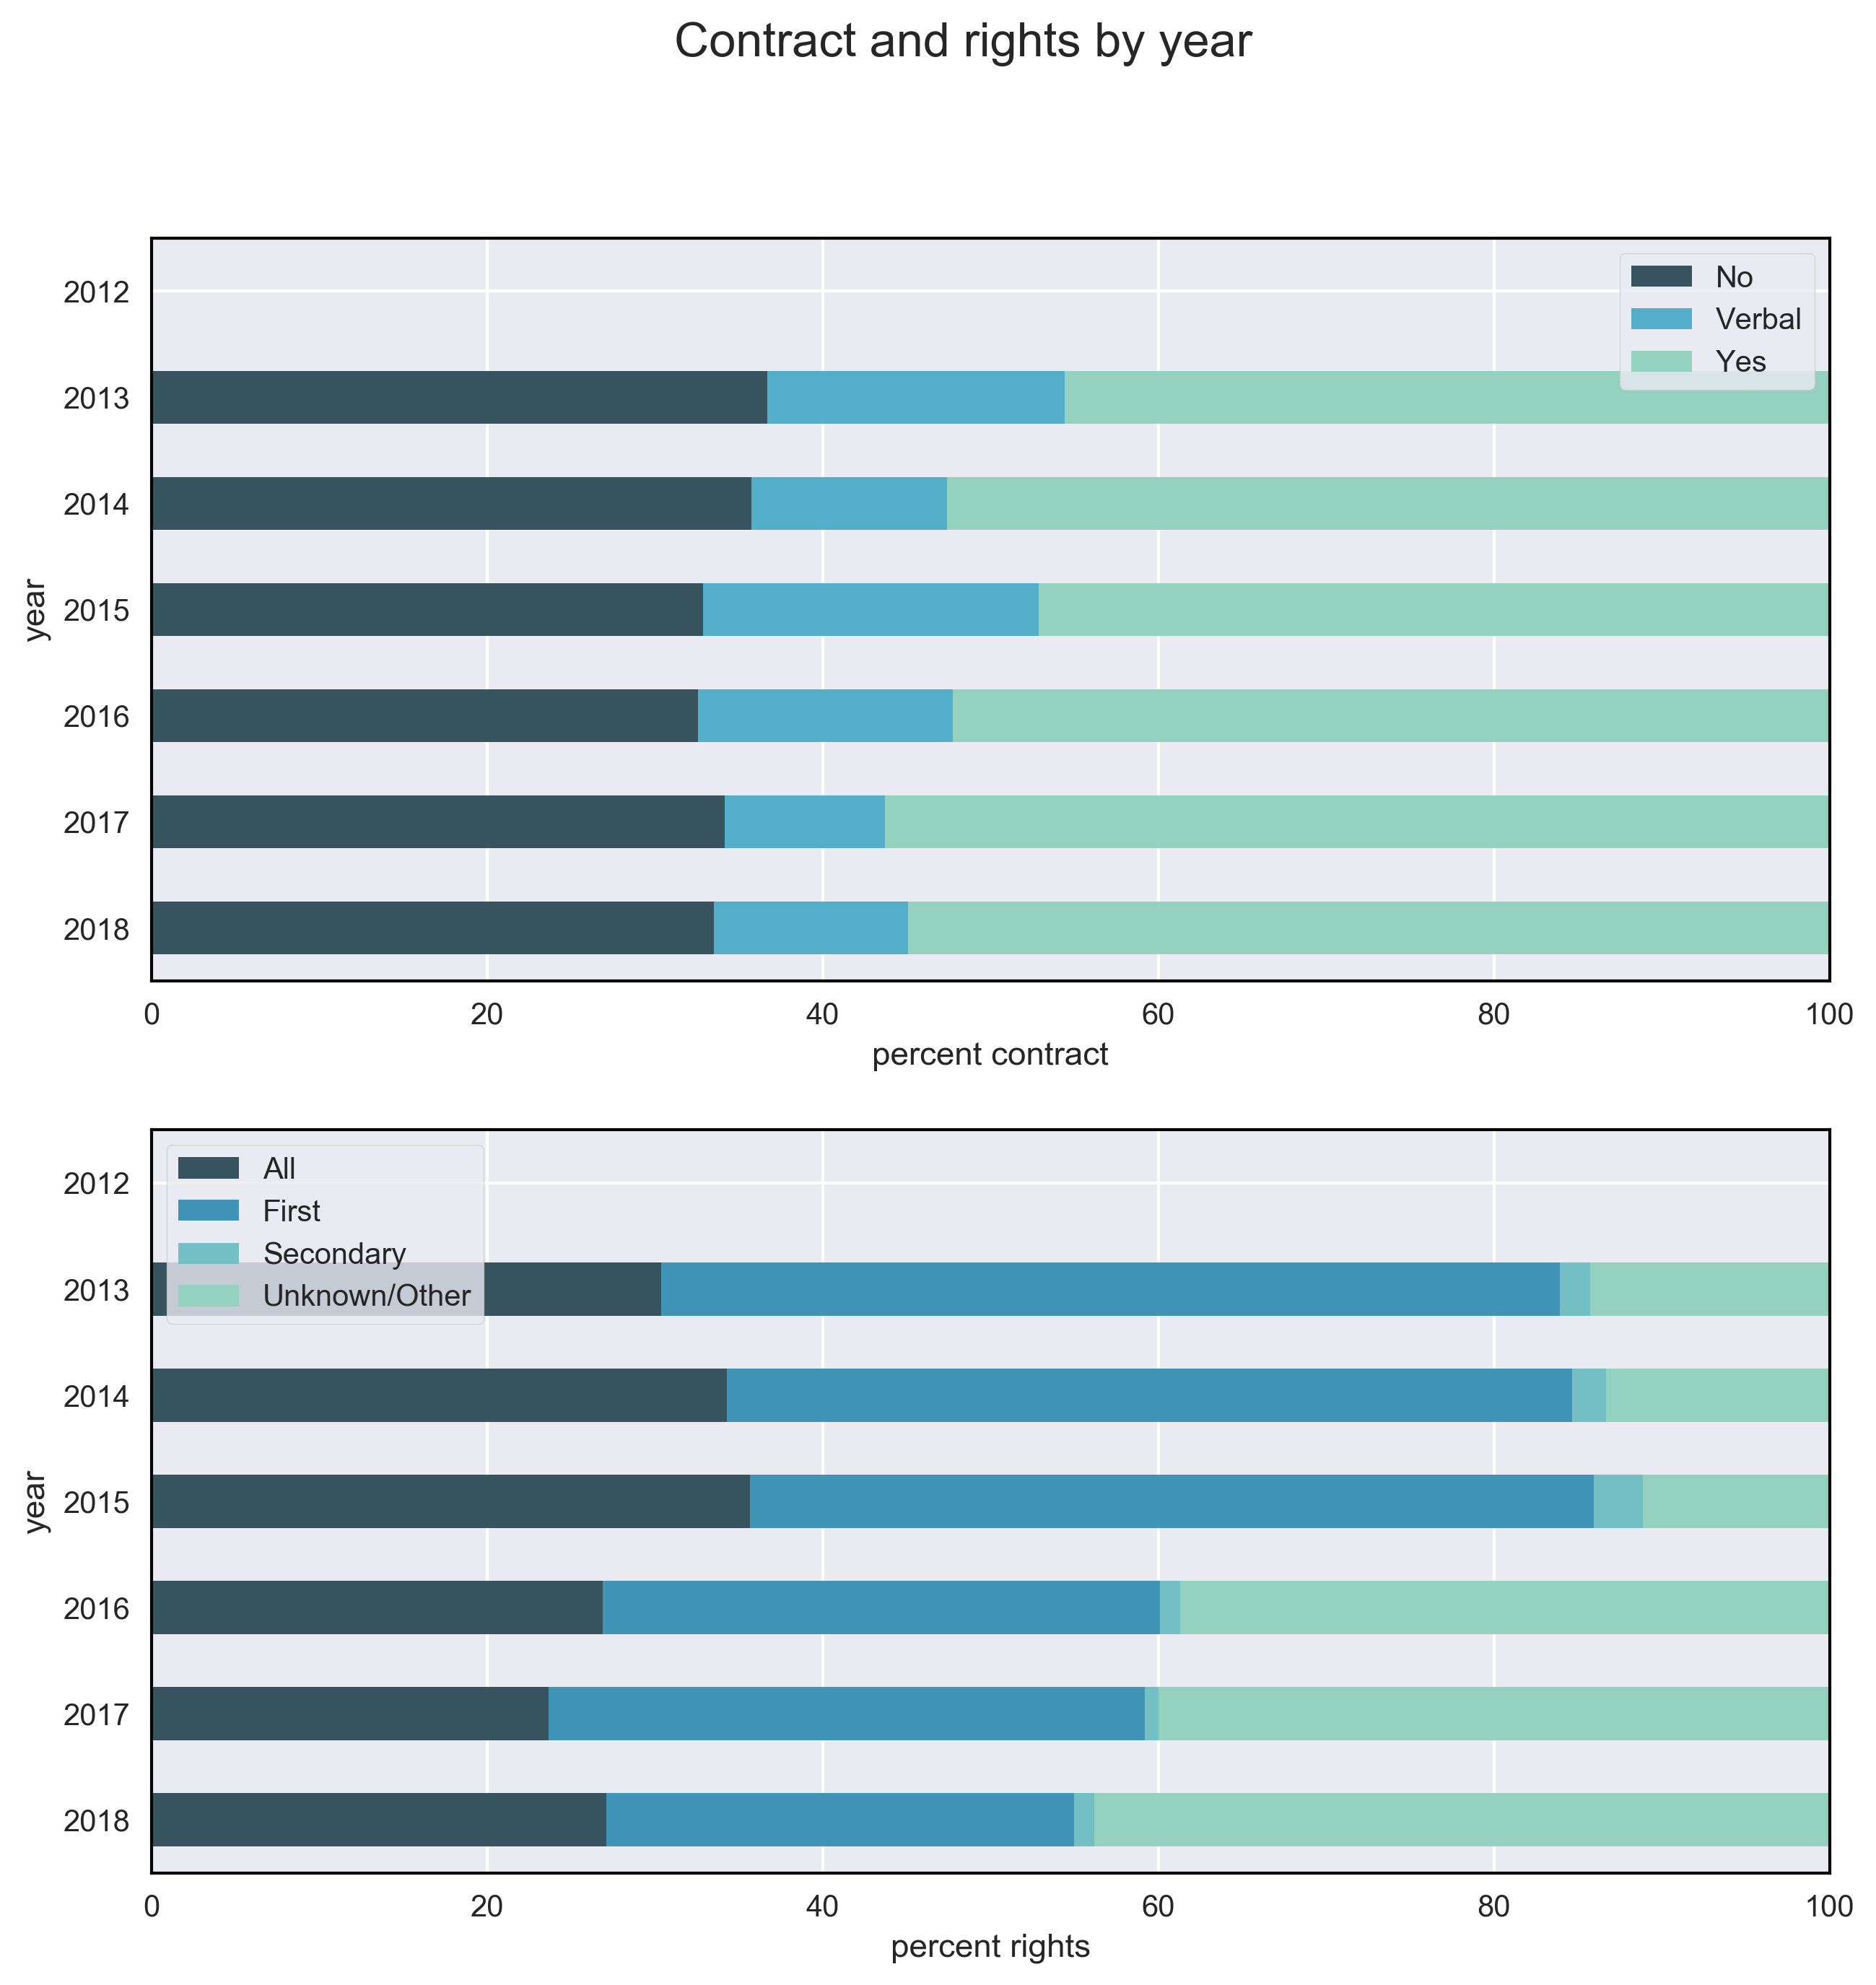

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10, 10))

create_stacked(df, column='year', by='contract', axes=ax[0], palette=sns.color_palette("GnBu_d"))
create_stacked(df, column='year', by='rights', axes=ax[1], palette=sns.color_palette("GnBu_d"))

fig.suptitle('Contract and rights by year', fontsize=16)

ax[0].set_ylabel('year')
ax[1].set_ylabel('year')
ax[0].set_xlabel('percent contract')
ax[1].set_xlabel('percent rights')

### By storyType

Text(0.5,1,'Days to be paid by story type')

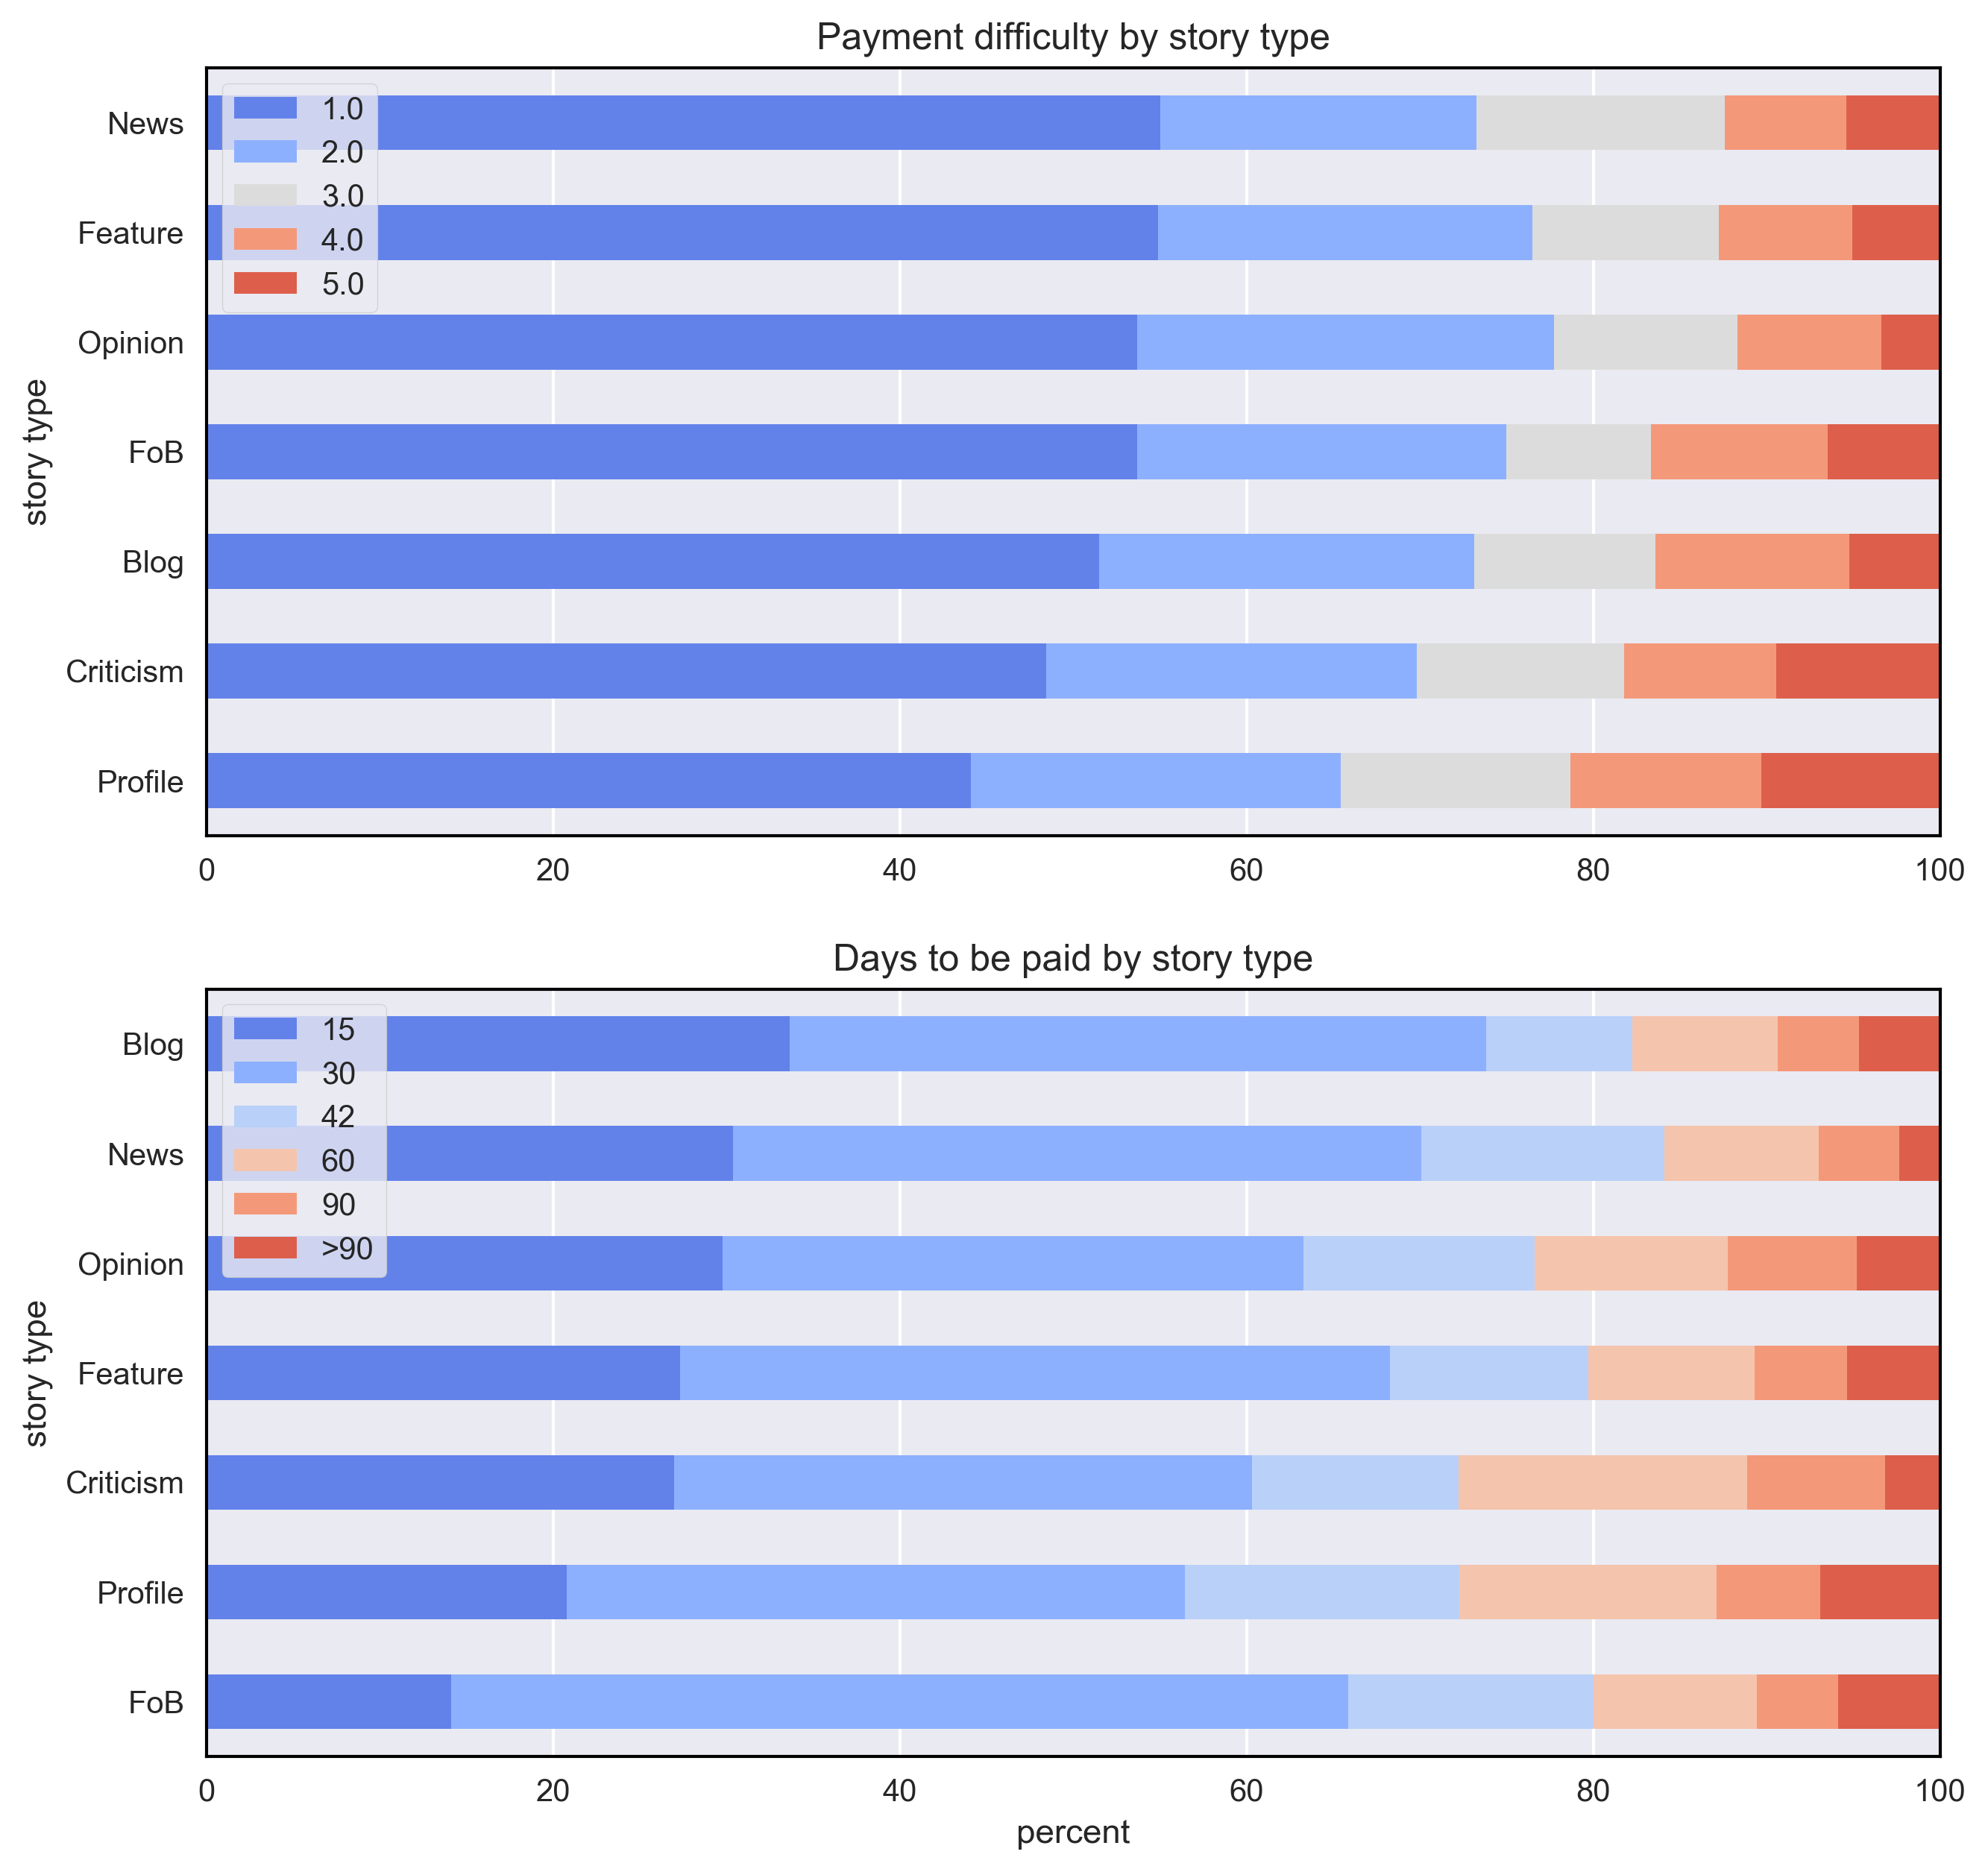

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10, 10))
create_stacked(df, column='storyType', by='paymentDifficulty', sort_by=1.0, axes=ax[0])
create_stacked(df.replace('Not Yet', np.nan), column='storyType', by='daysToBePaid', sort_by='15', axes=ax[1])

ax[1].set_xlabel('percent')
ax[0].set_ylabel('story type')
ax[1].set_ylabel('story type')
ax[0].set_title('Payment difficulty by story type')
ax[1].set_title('Days to be paid by story type')


### By relationship

Text(0.5,1,'Days to be paid by relationship')

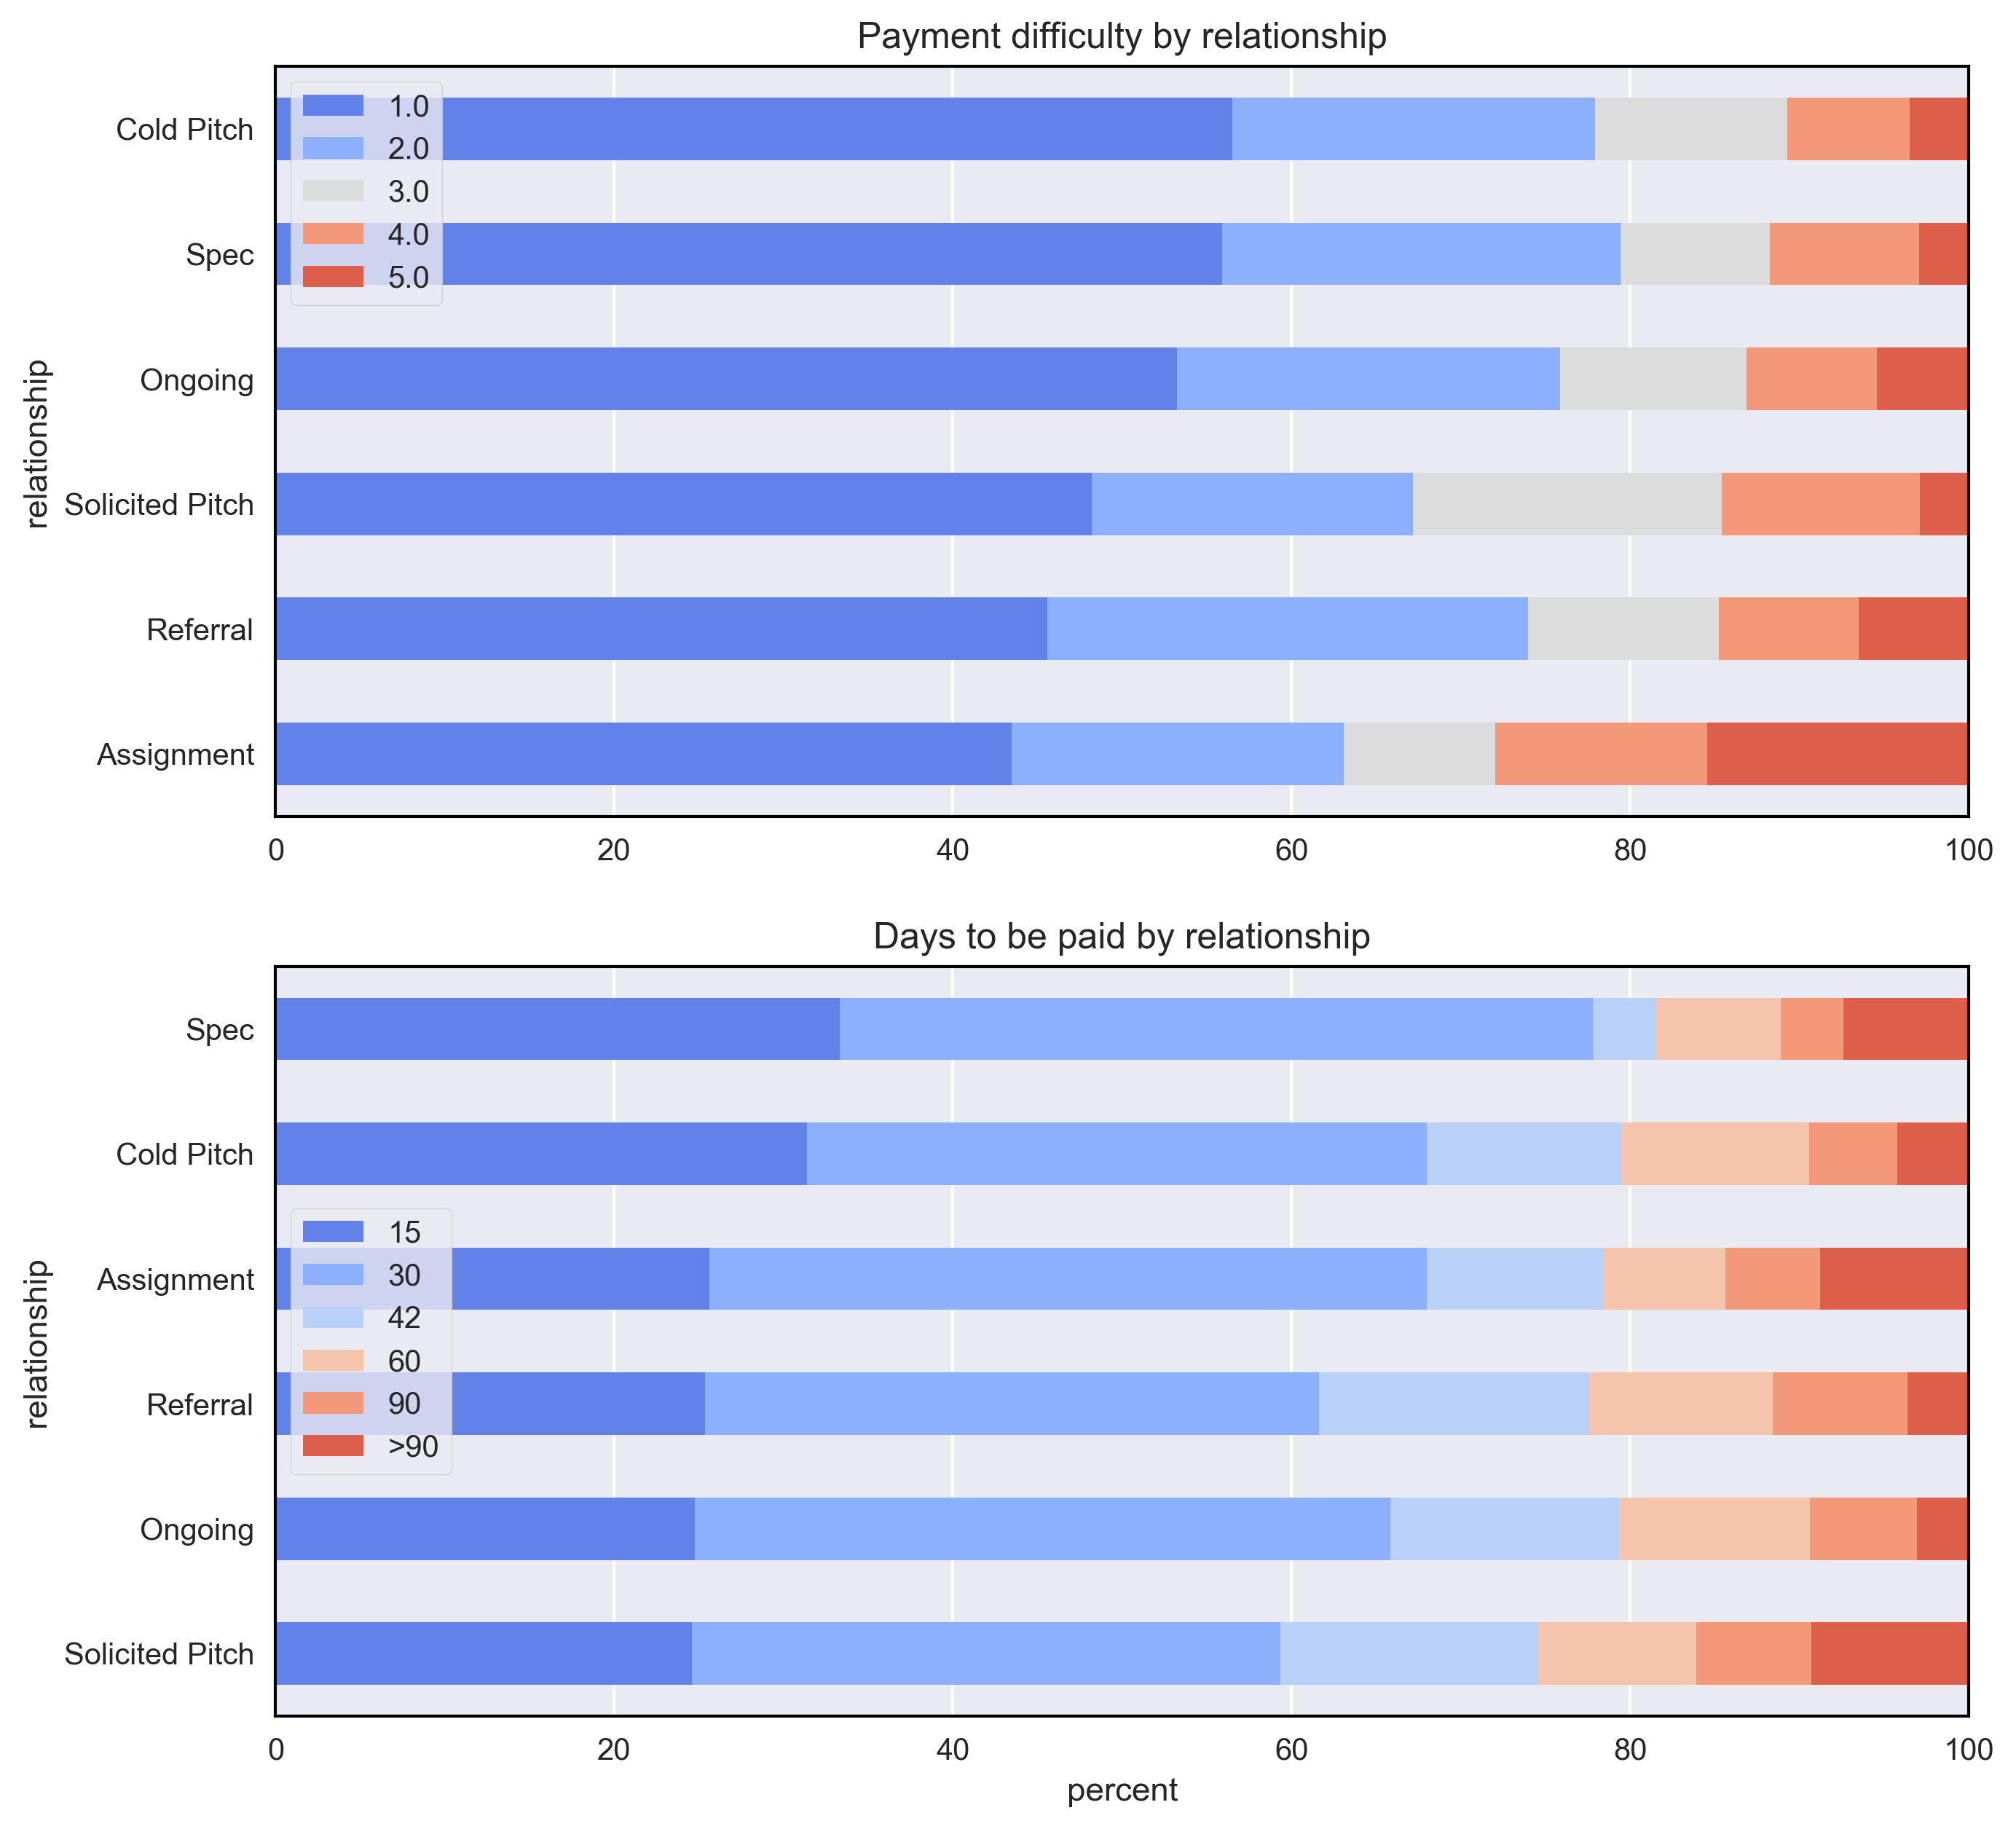

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10, 10))
create_stacked(df, column='relationship', by='paymentDifficulty', sort_by=1.0, axes=ax[0])
create_stacked(df.replace('Not Yet', np.nan), column='relationship', by='daysToBePaid', sort_by='15', axes=ax[1])

ax[1].set_xlabel('percent')
ax[0].set_ylabel('relationship')
ax[1].set_ylabel('relationship')
ax[0].set_title('Payment difficulty by relationship')
ax[1].set_title('Days to be paid by relationship')

Ignoring the following questions:

* pay red tape v levelOfReporting
* pay red tape v rights
* pay red tape v contract
* pay red tape v platform

I can't imagine those having interesting results